# Week 2: Coordinate Systems and Straight Lines

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 2 of 12

## Learning Objectives
- Cartesian coordinate system
- Distance formula and midpoint
- Slope and equations of lines
- Parallel and perpendicular lines
- Applications in linear models


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize, integrate, stats
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Suppress font warnings for Unicode mathematical symbols
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

# Configure matplotlib to handle Unicode symbols better
plt.rcParams['font.family'] = 'DejaVu Sans'

sp.init_printing()

print('✓ Libraries loaded')

✓ Libraries loaded


## 1. Cartesian Coordinate System

### What is a Coordinate System?
A **coordinate system** is a method for uniquely identifying points in space using numbers (coordinates). The **Cartesian (rectangular) coordinate system** uses perpendicular axes to define positions.

### 2D Cartesian Coordinates
In a 2D plane, every point is represented by an ordered pair $(x, y)$:
- **x-coordinate (abscissa)**: Horizontal distance from origin
- **y-coordinate (ordinate)**: Vertical distance from origin
- **Origin**: Point $(0, 0)$ where axes intersect

### Quadrants
The coordinate plane is divided into four quadrants:
- **Quadrant I**: $(+, +)$ - both coordinates positive
- **Quadrant II**: $(-, +)$ - x negative, y positive
- **Quadrant III**: $(-, -)$ - both coordinates negative
- **Quadrant IV**: $(+, -)$ - x positive, y negative

### Point Notation
$$P = (x, y) = (x_1, y_1)$$

### 3D Cartesian Coordinates
In 3D space, points are represented by $(x, y, z)$:
- **x-axis**: Left-right
- **y-axis**: Front-back
- **z-axis**: Up-down

### Data Science Applications
- **Feature Space**: Each feature is an axis, data points are coordinates
- **Visualization**: Scatter plots, 2D/3D visualizations
- **Geographic Data**: Latitude and longitude (coordinate system)
- **Image Processing**: Pixel locations as (x, y) coordinates
- **Clustering**: Points in n-dimensional space
- **Neural Networks**: Weight space coordinates

In [2]:
# Cartesian Coordinate System - 2D Basics and Quadrants

print("=" * 70)
print("CARTESIAN COORDINATE SYSTEM")
print("=" * 70)

# Example 1: 2D Coordinate System Basics
points_2d = {
    'A': (3, 4),
    'B': (-2, 5),
    'C': (-4, -3),
    'D': (5, -2),
    'Origin': (0, 0)
}

print("\n2D Points in Cartesian Plane:")
for name, (x, y) in points_2d.items():
    if x > 0 and y > 0:
        quad = "Quadrant I"
    elif x < 0 and y > 0:
        quad = "Quadrant II"
    elif x < 0 and y < 0:
        quad = "Quadrant III"
    elif x > 0 and y < 0:
        quad = "Quadrant IV"
    else:
        quad = "On axis"
    print(f"  {name}: ({x:3}, {y:3}) - {quad}")

CARTESIAN COORDINATE SYSTEM

2D Points in Cartesian Plane:
  A: (  3,   4) - Quadrant I
  B: ( -2,   5) - Quadrant II
  C: ( -4,  -3) - Quadrant III
  D: (  5,  -2) - Quadrant IV
  Origin: (  0,   0) - On axis


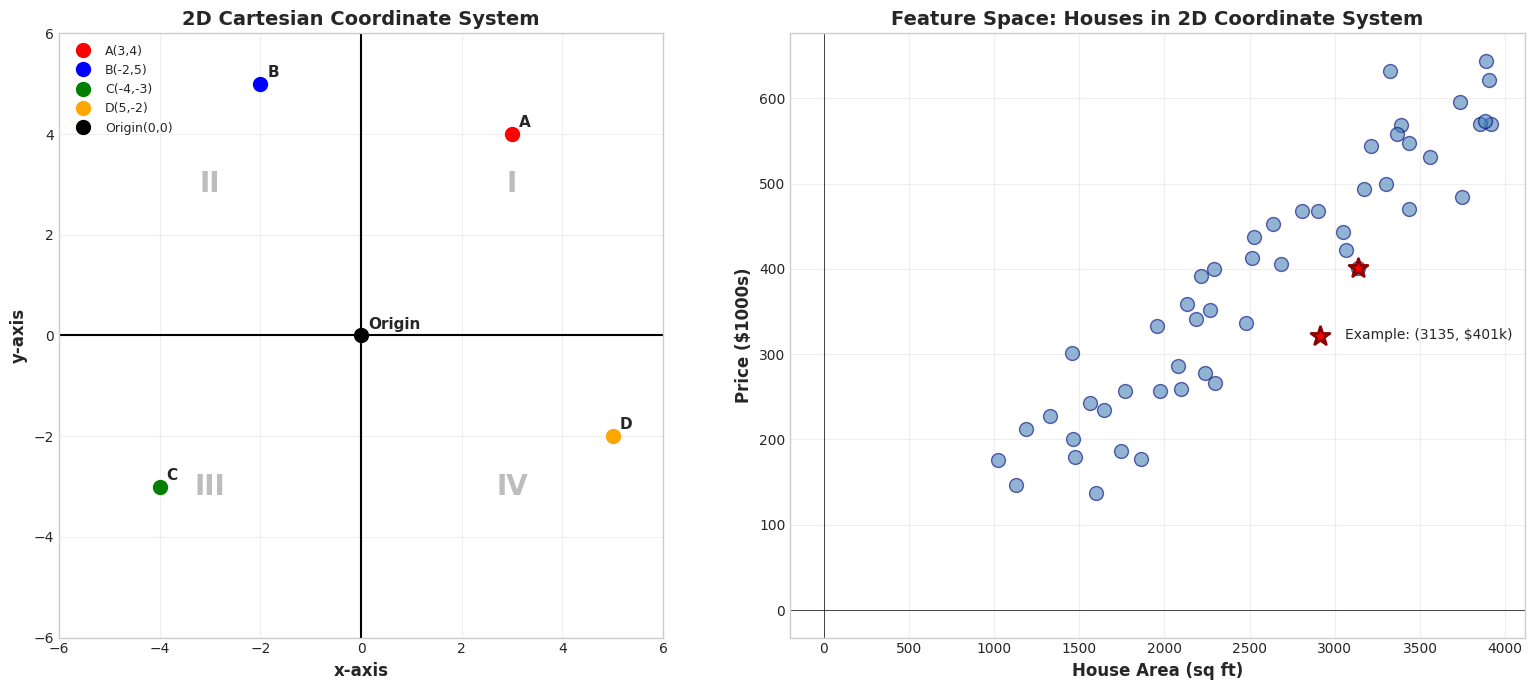

In [3]:
# Visualization: 2D Cartesian Plane with Quadrants and Feature Space
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Basic Cartesian Plane with Quadrants
ax1 = axes[0]
ax1.axhline(y=0, color='k', linewidth=1.5)
ax1.axvline(x=0, color='k', linewidth=1.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax1.set_xlabel('x-axis', fontsize=12, fontweight='bold')
ax1.set_ylabel('y-axis', fontsize=12, fontweight='bold')
ax1.set_title('2D Cartesian Coordinate System', fontsize=14, fontweight='bold')

# Plot points
colors = ['red', 'blue', 'green', 'orange', 'black']
for (name, (x, y)), color in zip(points_2d.items(), colors):
    ax1.plot(x, y, 'o', markersize=10, color=color, label=f'{name}({x},{y})')
    ax1.annotate(name, (x, y), xytext=(5, 5), textcoords='offset points', 
                fontsize=11, fontweight='bold')

# Label quadrants
ax1.text(3, 3, 'I', fontsize=20, ha='center', va='center', alpha=0.3, fontweight='bold')
ax1.text(-3, 3, 'II', fontsize=20, ha='center', va='center', alpha=0.3, fontweight='bold')
ax1.text(-3, -3, 'III', fontsize=20, ha='center', va='center', alpha=0.3, fontweight='bold')
ax1.text(3, -3, 'IV', fontsize=20, ha='center', va='center', alpha=0.3, fontweight='bold')

ax1.legend(loc='upper left', fontsize=9)
ax1.set_aspect('equal')

# Plot 2: Data Science Application - Feature Space
ax2 = axes[1]

# Generate sample data: houses with 2 features
np.random.seed(42)
house_area = np.random.randint(1000, 4000, 50)  # Square feet
house_price = house_area * 150 + np.random.normal(0, 50000, 50)  # Price

ax2.scatter(house_area, house_price / 1000, alpha=0.6, s=100, c='steelblue', edgecolors='navy')
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('House Area (sq ft)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Price ($1000s)', fontsize=12, fontweight='bold')
ax2.set_title('Feature Space: Houses in 2D Coordinate System', fontsize=14, fontweight='bold')

# Highlight a specific house
highlight_idx = 10
ax2.scatter(house_area[highlight_idx], house_price[highlight_idx] / 1000, 
           s=200, c='red', marker='*', edgecolors='darkred', linewidth=2, 
           label=f'Example: ({house_area[highlight_idx]}, ${house_price[highlight_idx]/1000:.0f}k)')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [4]:
# Feature Space Interpretation
print(f"\n📊 Feature Space Interpretation:")
print(f"   • Each house is a point in 2D space")
print(f"   • x-axis: Feature 1 (Area)")
print(f"   • y-axis: Feature 2 (Price)")
print(f"   • Total houses plotted: {len(house_area)}")


📊 Feature Space Interpretation:
   • Each house is a point in 2D space
   • x-axis: Feature 1 (Area)
   • y-axis: Feature 2 (Price)
   • Total houses plotted: 50


In [5]:
# 3D Cartesian Coordinates - Data Generation
print("\n" + "=" * 70)
print("3D CARTESIAN COORDINATES")
print("=" * 70)

# Generate 3D data
np.random.seed(42)
n_points = 30
x_3d = np.random.randn(n_points)
y_3d = np.random.randn(n_points)
z_3d = np.random.randn(n_points)

# Generate customer segmentation data
age = np.random.randint(20, 70, 40)
income = np.random.randint(30, 150, 40)  # $1000s
purchases = np.random.randint(1, 50, 40)


3D CARTESIAN COORDINATES


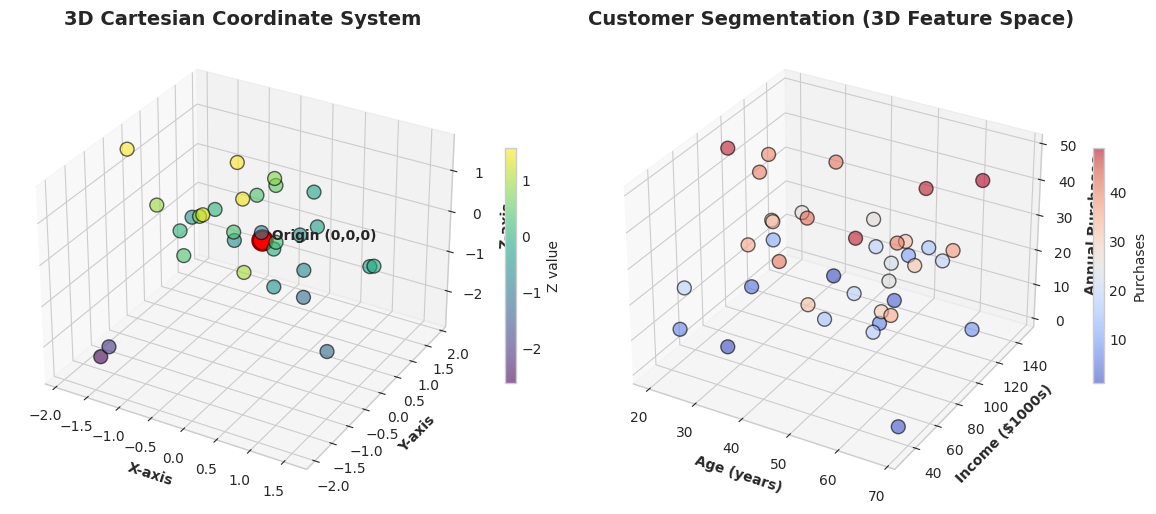

In [6]:
# Visualization: 3D Coordinate System and Customer Segmentation
fig = plt.figure(figsize=(12, 5))

# 3D scatter plot
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(x_3d, y_3d, z_3d, c=z_3d, cmap='viridis', s=100, alpha=0.6, edgecolors='black')
ax1.set_xlabel('X-axis', fontweight='bold')
ax1.set_ylabel('Y-axis', fontweight='bold')
ax1.set_zlabel('Z-axis', fontweight='bold')
ax1.set_title('3D Cartesian Coordinate System', fontsize=14, fontweight='bold')
fig.colorbar(scatter, ax=ax1, shrink=0.5, label='Z value')

# Mark origin
ax1.scatter([0], [0], [0], color='red', s=200, marker='o', edgecolors='darkred', linewidth=2)
ax1.text(0, 0, 0, '  Origin (0,0,0)', fontsize=10, fontweight='bold')

# 3D Data Science Application
ax2 = fig.add_subplot(122, projection='3d')

scatter2 = ax2.scatter(age, income, purchases, c=purchases, cmap='coolwarm', 
                       s=100, alpha=0.6, edgecolors='black')
ax2.set_xlabel('Age (years)', fontweight='bold')
ax2.set_ylabel('Income ($1000s)', fontweight='bold')
ax2.set_zlabel('Annual Purchases', fontweight='bold')
ax2.set_title('Customer Segmentation (3D Feature Space)', fontsize=14, fontweight='bold')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, label='Purchases')

plt.tight_layout()
plt.show()

In [7]:
# 3D Feature Space Interpretation
print(f"\n📊 3D Feature Space:")
print(f"   • Each customer is a point in 3D space")
print(f"   • Axis 1: Age (demographic)")
print(f"   • Axis 2: Income (economic)")
print(f"   • Axis 3: Purchases (behavioral)")
print(f"   • Used for clustering and segmentation")


📊 3D Feature Space:
   • Each customer is a point in 3D space
   • Axis 1: Age (demographic)
   • Axis 2: Income (economic)
   • Axis 3: Purchases (behavioral)
   • Used for clustering and segmentation


In [8]:
# Coordinate Transformations - Setup
print("\n" + "=" * 70)
print("COORDINATE TRANSFORMATIONS")
print("=" * 70)

# Translation (shift)
def translate(points, dx, dy):
    """Translate points by (dx, dy)"""
    return [(x + dx, y + dy) for x, y in points]

# Scaling
def scale(points, sx, sy):
    """Scale points by factors (sx, sy)"""
    return [(x * sx, y * sy) for x, y in points]

# Original shape (square)
square = [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)]

# Transformed shapes
translated = translate(square, 4, 0)
scaled = scale(square, 1.5, 1.5)


COORDINATE TRANSFORMATIONS


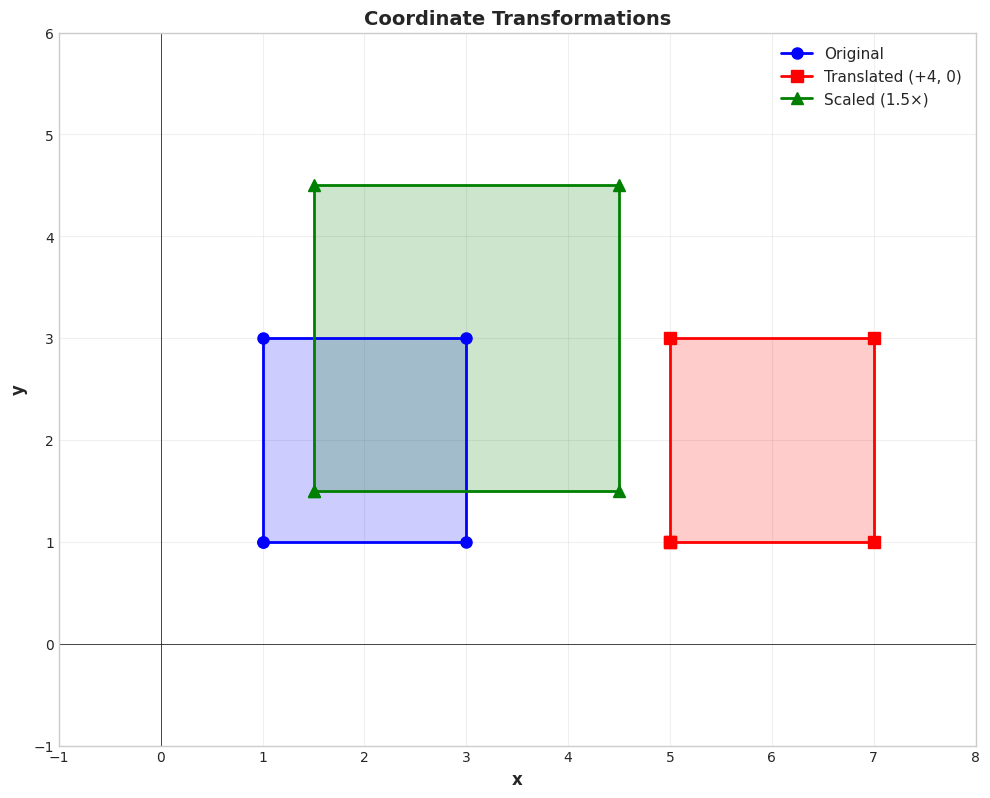

In [9]:
# Visualization: Coordinate Transformations
fig, ax = plt.subplots(figsize=(10, 10))

# Plot original
x_orig, y_orig = zip(*square)
ax.plot(x_orig, y_orig, 'b-o', linewidth=2, markersize=8, label='Original')
ax.fill(x_orig, y_orig, alpha=0.2, color='blue')

# Plot translated
x_trans, y_trans = zip(*translated)
ax.plot(x_trans, y_trans, 'r-s', linewidth=2, markersize=8, label='Translated (+4, 0)')
ax.fill(x_trans, y_trans, alpha=0.2, color='red')

# Plot scaled
x_scale, y_scale = zip(*scaled)
ax.plot(x_scale, y_scale, 'g-^', linewidth=2, markersize=8, label='Scaled (1.5×)')
ax.fill(x_scale, y_scale, alpha=0.2, color='green')

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('y', fontsize=12, fontweight='bold')
ax.set_title('Coordinate Transformations', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.set_aspect('equal')
ax.set_xlim(-1, 8)
ax.set_ylim(-1, 6)

plt.tight_layout()
plt.show()

In [10]:
# Key Takeaway - Coordinate Systems
print("\n🎯 Key Takeaway:")
print("   Coordinate systems provide a framework for:")
print("   • Representing data points in space")
print("   • Measuring distances and relationships")
print("   • Transforming and manipulating data")
print("   • Visualizing multi-dimensional information")


🎯 Key Takeaway:
   Coordinate systems provide a framework for:
   • Representing data points in space
   • Measuring distances and relationships
   • Transforming and manipulating data
   • Visualizing multi-dimensional information


## 2. Distance Formula and Midpoint

### Distance Formula
The distance between two points $P_1 = (x_1, y_1)$ and $P_2 = (x_2, y_2)$ in a plane is:

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

**Derivation**: Uses the Pythagorean theorem on the right triangle formed by the points.

### 3D Distance Formula
For points in 3D space $(x_1, y_1, z_1)$ and $(x_2, y_2, z_2)$:

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}$$

### Midpoint Formula
The midpoint $M$ between two points $P_1$ and $P_2$ is:

$$M = \left(\frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2}\right)$$

The midpoint is the average of the coordinates.

### Properties
1. **Symmetry**: $d(P_1, P_2) = d(P_2, P_1)$
2. **Non-negative**: $d \geq 0$, and $d = 0$ only if $P_1 = P_2$
3. **Triangle Inequality**: $d(P_1, P_3) \leq d(P_1, P_2) + d(P_2, P_3)$

### Data Science Applications
- **Euclidean Distance**: Similarity measure in clustering (K-means)
- **K-Nearest Neighbors (KNN)**: Find closest data points
- **Distance Metrics**: Manhattan, Euclidean, Cosine distance
- **Recommendation Systems**: Item similarity based on distance
- **Anomaly Detection**: Points far from cluster centers
- **Geographic Analysis**: Distance between locations

In [11]:
# Distance Formula and Midpoint - Functions and Basic Example

print("=" * 70)
print("DISTANCE FORMULA AND MIDPOINT")
print("=" * 70)

# Example 1: Distance Calculation
def euclidean_distance_2d(p1, p2):
    """Calculate Euclidean distance between two 2D points"""
    x1, y1 = p1
    x2, y2 = p2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def midpoint_2d(p1, p2):
    """Calculate midpoint between two 2D points"""
    x1, y1 = p1
    x2, y2 = p2
    return ((x1 + x2) / 2, (y1 + y2) / 2)

# Test points
A = (1, 2)
B = (4, 6)

distance_AB = euclidean_distance_2d(A, B)
midpoint_AB = midpoint_2d(A, B)

print(f"\nPoint A: {A}")
print(f"Point B: {B}")
print(f"\nDistance AB: {distance_AB:.4f}")
print(f"Midpoint M: ({midpoint_AB[0]:.2f}, {midpoint_AB[1]:.2f})")

# Manual calculation verification
print(f"\nManual Verification:")
print(f"  √[(4-1)² + (6-2)²] = √[9 + 16] = √25 = 5.0 ✓")
print(f"  Midpoint: ((1+4)/2, (2+6)/2) = (2.5, 4.0) ✓")

DISTANCE FORMULA AND MIDPOINT

Point A: (1, 2)
Point B: (4, 6)

Distance AB: 5.0000
Midpoint M: (2.50, 4.00)

Manual Verification:
  √[(4-1)² + (6-2)²] = √[9 + 16] = √25 = 5.0 ✓
  Midpoint: ((1+4)/2, (2+6)/2) = (2.5, 4.0) ✓


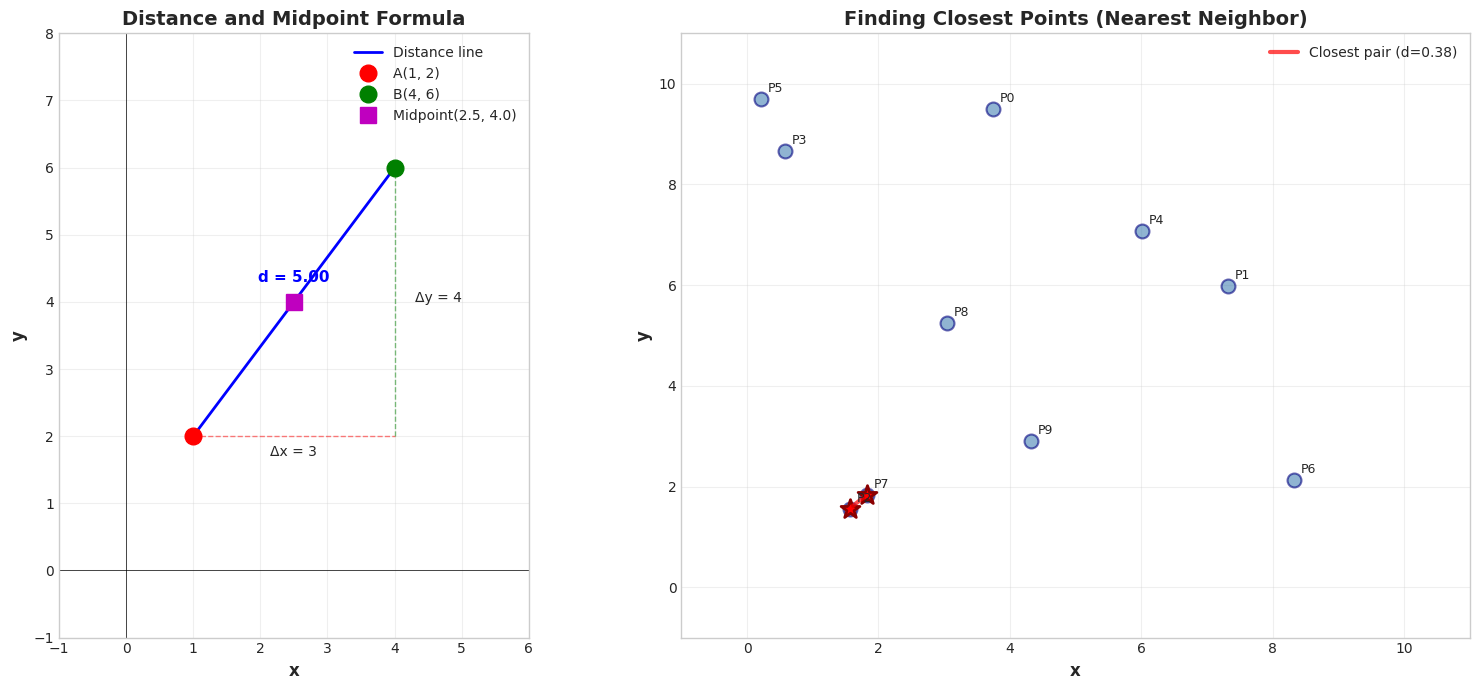

In [12]:
# Visualization: Distance, Midpoint, and Closest Pairs
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Distance and Midpoint Visualization
ax1 = axes[0]
ax1.plot([A[0], B[0]], [A[1], B[1]], 'b-', linewidth=2, label='Distance line')
ax1.plot(*A, 'ro', markersize=12, label=f'A{A}')
ax1.plot(*B, 'go', markersize=12, label=f'B{B}')
ax1.plot(*midpoint_AB, 'ms', markersize=12, label=f'Midpoint{midpoint_AB}')

# Draw right triangle to show Pythagorean theorem
ax1.plot([A[0], B[0]], [A[1], A[1]], 'r--', alpha=0.5, linewidth=1)
ax1.plot([B[0], B[0]], [A[1], B[1]], 'g--', alpha=0.5, linewidth=1)
ax1.text((A[0] + B[0])/2, A[1] - 0.3, f'Δx = {B[0] - A[0]}', ha='center', fontsize=10)
ax1.text(B[0] + 0.3, (A[1] + B[1])/2, f'Δy = {B[1] - A[1]}', ha='left', fontsize=10)
ax1.text((A[0] + B[0])/2, (A[1] + B[1])/2 + 0.3, f'd = {distance_AB:.2f}', 
         ha='center', fontsize=11, fontweight='bold', color='blue')

ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Distance and Midpoint Formula', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_aspect('equal')
ax1.set_xlim(-1, 6)
ax1.set_ylim(-1, 8)

# Plot 2: Multiple Points - Finding Closest Pairs
ax2 = axes[1]

# Generate random points
np.random.seed(42)
n_points = 10
points = np.random.rand(n_points, 2) * 10

# Plot all points
ax2.scatter(points[:, 0], points[:, 1], s=100, c='steelblue', 
           alpha=0.6, edgecolors='navy', linewidth=1.5)

# Label points
for i, (x, y) in enumerate(points):
    ax2.annotate(f'P{i}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)

# Find and highlight two closest points
min_dist = float('inf')
closest_pair = None

for i in range(len(points)):
    for j in range(i + 1, len(points)):
        dist = euclidean_distance_2d(points[i], points[j])
        if dist < min_dist:
            min_dist = dist
            closest_pair = (i, j)

# Highlight closest pair
i, j = closest_pair
ax2.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 
        'r-', linewidth=3, alpha=0.7, label=f'Closest pair (d={min_dist:.2f})')
ax2.scatter([points[i][0], points[j][0]], [points[i][1], points[j][1]], 
           s=200, c='red', marker='*', edgecolors='darkred', linewidth=2)

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Finding Closest Points (Nearest Neighbor)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_xlim(-1, 11)
ax2.set_ylim(-1, 11)

plt.tight_layout()
plt.show()

In [13]:
# Closest Pair Analysis
print(f"\n📊 Closest Pair Analysis:")
print(f"   • Found {n_points} points")
print(f"   • Closest pair: P{closest_pair[0]} and P{closest_pair[1]}")
print(f"   • Minimum distance: {min_dist:.4f}")


📊 Closest Pair Analysis:
   • Found 10 points
   • Closest pair: P2 and P7
   • Minimum distance: 0.3765


In [14]:
# K-Nearest Neighbors - Data Preparation
print("\n" + "=" * 70)
print("DATA SCIENCE APPLICATION: K-NEAREST NEIGHBORS (KNN)")
print("=" * 70)

# Generate sample dataset
np.random.seed(42)
# Class 0: centered around (2, 2)
class_0 = np.random.randn(30, 2) * 0.8 + [2, 2]
# Class 1: centered around (7, 7)
class_1 = np.random.randn(30, 2) * 0.8 + [7, 7]

# New point to classify
new_point = np.array([5, 4])

# Calculate distances from new point to all training points
all_points = np.vstack([class_0, class_1])
distances = [euclidean_distance_2d(new_point, point) for point in all_points]

# Find k nearest neighbors (k=5)
k = 5
nearest_indices = np.argsort(distances)[:k]


DATA SCIENCE APPLICATION: K-NEAREST NEIGHBORS (KNN)


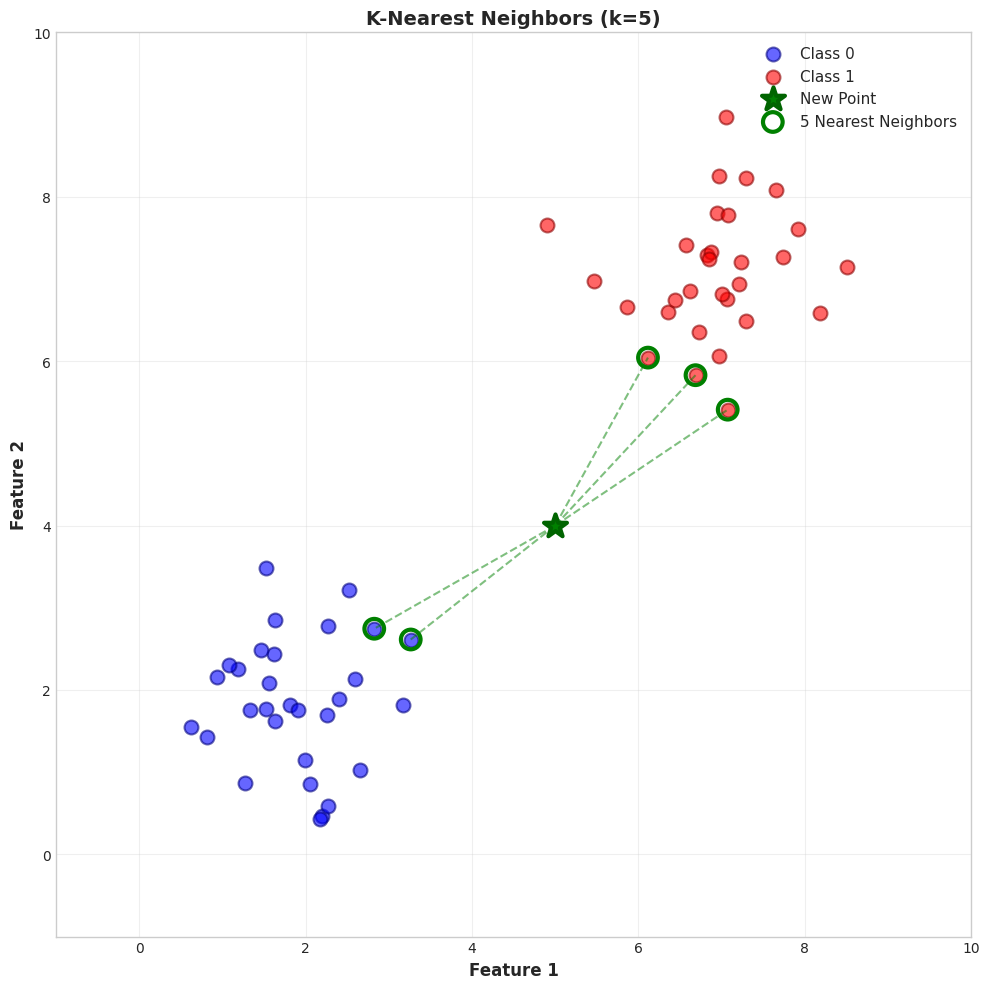

In [15]:
# Visualization: K-Nearest Neighbors
fig, ax = plt.subplots(figsize=(10, 10))

# Plot training data
ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', s=100, alpha=0.6, 
          edgecolors='navy', linewidth=1.5, label='Class 0')
ax.scatter(class_1[:, 0], class_1[:, 1], c='red', s=100, alpha=0.6, 
          edgecolors='darkred', linewidth=1.5, label='Class 1')

# Plot new point
ax.scatter(*new_point, c='green', s=300, marker='*', 
          edgecolors='darkgreen', linewidth=3, label='New Point', zorder=5)

# Draw lines to k nearest neighbors
for idx in nearest_indices:
    ax.plot([new_point[0], all_points[idx, 0]], 
           [new_point[1], all_points[idx, 1]], 
           'g--', alpha=0.5, linewidth=1.5)
    
# Highlight k nearest neighbors
neighbors = all_points[nearest_indices]
ax.scatter(neighbors[:, 0], neighbors[:, 1], s=200, facecolors='none', 
          edgecolors='green', linewidth=3, label=f'{k} Nearest Neighbors')

ax.grid(True, alpha=0.3)
ax.set_xlabel('Feature 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature 2', fontsize=12, fontweight='bold')
ax.set_title(f'K-Nearest Neighbors (k={k})', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)

plt.tight_layout()
plt.show()

In [16]:
# KNN Classification Results
# Classify based on majority vote
class_labels = np.array([0] * 30 + [1] * 30)
neighbor_classes = class_labels[nearest_indices]
predicted_class = np.bincount(neighbor_classes).argmax()

print(f"\nClassification Results:")
print(f"   • New point: {new_point}")
print(f"   • k (neighbors): {k}")
print(f"   • Neighbor classes: {neighbor_classes}")
print(f"   • Predicted class: {predicted_class}")
print(f"   • Distances to neighbors: {[f'{distances[i]:.2f}' for i in nearest_indices]}")


Classification Results:
   • New point: [5 4]
   • k (neighbors): 5
   • Neighbor classes: [0 1 1 1 0]
   • Predicted class: 1
   • Distances to neighbors: ['2.22', '2.33', '2.49', '2.51', '2.51']


In [17]:
# Different Distance Metrics - Setup
print("\n" + "=" * 70)
print("DIFFERENT DISTANCE METRICS")
print("=" * 70)

def manhattan_distance(p1, p2):
    """Manhattan (L1) distance"""
    return abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])

def chebyshev_distance(p1, p2):
    """Chebyshev (L∞) distance"""
    return max(abs(p2[0] - p1[0]), abs(p2[1] - p1[1]))

p1 = (0, 0)
p2 = (3, 4)

euclidean = euclidean_distance_2d(p1, p2)
manhattan = manhattan_distance(p1, p2)
chebyshev = chebyshev_distance(p1, p2)

print(f"\nPoint 1: {p1}")
print(f"Point 2: {p2}")
print(f"\nEuclidean distance:  {euclidean:.4f} (straight line)")
print(f"Manhattan distance:  {manhattan:.4f} (grid path)")
print(f"Chebyshev distance:  {chebyshev:.4f} (max of differences)")


DIFFERENT DISTANCE METRICS

Point 1: (0, 0)
Point 2: (3, 4)

Euclidean distance:  5.0000 (straight line)
Manhattan distance:  7.0000 (grid path)
Chebyshev distance:  4.0000 (max of differences)


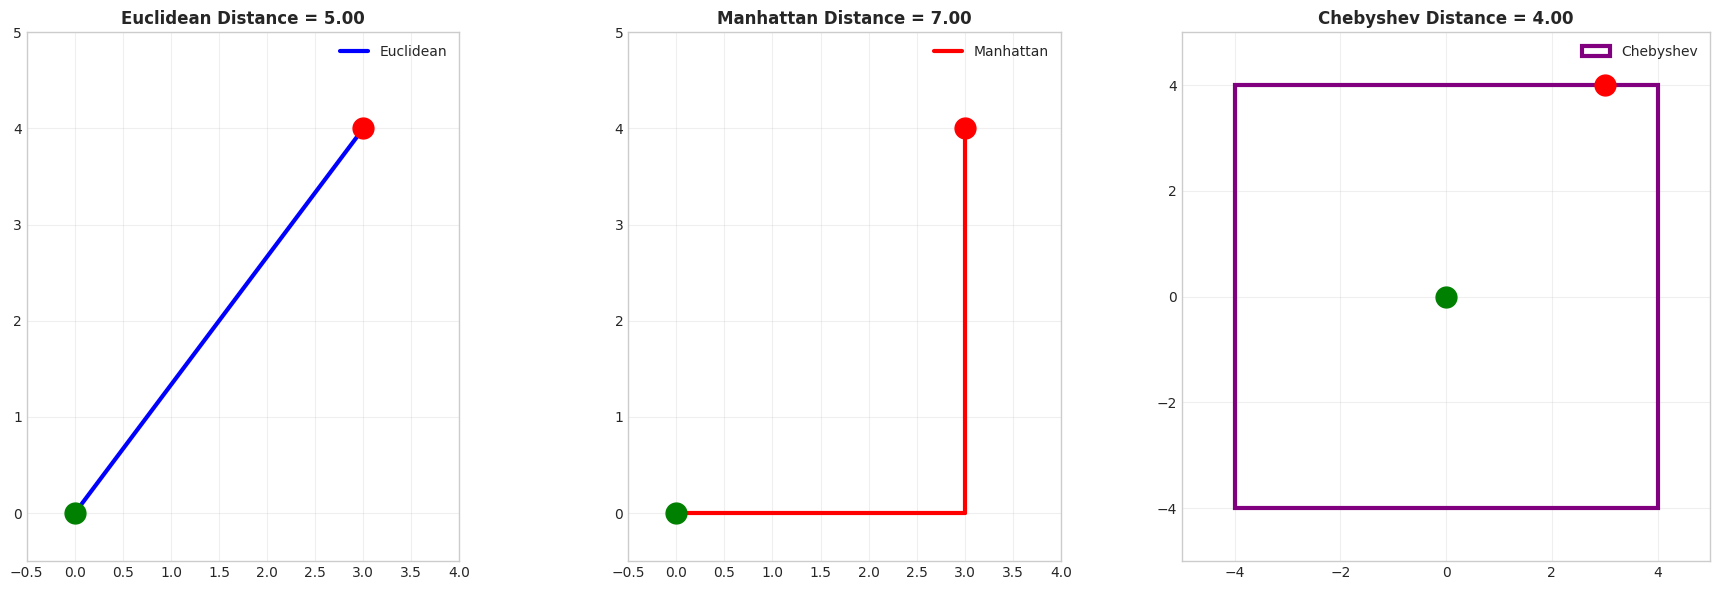

In [18]:
# Visualization: Different Distance Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Euclidean
ax = axes[0]
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-', linewidth=3, label='Euclidean')
ax.plot(*p1, 'go', markersize=15)
ax.plot(*p2, 'ro', markersize=15)
ax.grid(True, alpha=0.3)
ax.set_title(f'Euclidean Distance = {euclidean:.2f}', fontsize=12, fontweight='bold')
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 5)
ax.set_aspect('equal')
ax.legend()

# Manhattan
ax = axes[1]
ax.plot([p1[0], p2[0]], [p1[1], p1[1]], 'r-', linewidth=3)
ax.plot([p2[0], p2[0]], [p1[1], p2[1]], 'r-', linewidth=3, label='Manhattan')
ax.plot(*p1, 'go', markersize=15)
ax.plot(*p2, 'ro', markersize=15)
ax.grid(True, alpha=0.3)
ax.set_title(f'Manhattan Distance = {manhattan:.2f}', fontsize=12, fontweight='bold')
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 5)
ax.set_aspect('equal')
ax.legend()

# Chebyshev
ax = axes[2]
square = plt.Rectangle((p1[0] - chebyshev, p1[1] - chebyshev), 
                       2 * chebyshev, 2 * chebyshev, 
                       fill=False, edgecolor='purple', linewidth=3, label='Chebyshev')
ax.add_patch(square)
ax.plot(*p1, 'go', markersize=15)
ax.plot(*p2, 'ro', markersize=15)
ax.grid(True, alpha=0.3)
ax.set_title(f'Chebyshev Distance = {chebyshev:.2f}', fontsize=12, fontweight='bold')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.legend()

plt.tight_layout()
plt.show()

In [19]:
# Distance Metrics Summary
print("\n🎯 Distance Metrics in ML:")
print("   • Euclidean: General-purpose, sensitive to magnitude")
print("   • Manhattan: Good for grid-based problems, robust to outliers")
print("   • Chebyshev: Maximum difference, chess king moves")


🎯 Distance Metrics in ML:
   • Euclidean: General-purpose, sensitive to magnitude
   • Manhattan: Good for grid-based problems, robust to outliers
   • Chebyshev: Maximum difference, chess king moves


## 3. Slope and Equations of Lines

### Slope (Gradient)
The **slope** $m$ of a line through points $(x_1, y_1)$ and $(x_2, y_2)$ measures steepness:

$$m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{\Delta y}{\Delta x} = \frac{\text{rise}}{\text{run}}$$

### Slope Interpretation
- **Positive slope**: Line rises (increases) from left to right
- **Negative slope**: Line falls (decreases) from left to right
- **Zero slope**: Horizontal line ($y = c$)
- **Undefined slope**: Vertical line ($x = c$)

### Equations of a Line

#### 1. **Slope-Intercept Form**
$$y = mx + b$$
where $m$ is slope and $b$ is y-intercept

#### 2. **Point-Slope Form**
$$y - y_1 = m(x - x_1)$$
Use when you know slope and one point

#### 3. **Two-Point Form**
$$\frac{y - y_1}{y_2 - y_1} = \frac{x - x_1}{x_2 - x_1}$$
Use when you know two points

#### 4. **Standard Form**
$$Ax + By + C = 0$$
General form, where $A, B, C$ are constants

#### 5. **Intercept Form**
$$\frac{x}{a} + \frac{y}{b} = 1$$
where $a$ is x-intercept and $b$ is y-intercept

### Data Science Applications
- **Linear Regression**: $y = mx + b$ models relationships
- **Gradient Descent**: Slope guides optimization direction
- **Feature Scaling**: Understanding linear transformations
- **Trend Analysis**: Slope indicates rate of change
- **Correlation**: Slope of best-fit line shows relationship strength
- **Time Series**: Trend lines model temporal patterns

In [20]:
# Slope - Definition and Calculations

print("=" * 70)
print("SLOPE AND EQUATIONS OF LINES")
print("=" * 70)

# Example 1: Calculating Slope
def calculate_slope(p1, p2):
    """Calculate slope between two points"""
    x1, y1 = p1
    x2, y2 = p2
    if x2 == x1:
        return float('inf')  # Undefined (vertical line)
    return (y2 - y1) / (x2 - x1)

# Test points
points_pairs = [
    ((1, 2), (4, 8), "Positive"),
    ((1, 5), (6, 2), "Negative"),
    ((2, 3), (7, 3), "Zero (horizontal)"),
    ((4, 1), (4, 6), "Undefined (vertical)")
]

print("\nSlope Calculations:")
for p1, p2, desc in points_pairs:
    slope = calculate_slope(p1, p2)
    if slope == float('inf'):
        print(f"  {p1} to {p2}: Undefined (vertical line) - {desc}")
    else:
        print(f"  {p1} to {p2}: m = {slope:.2f} - {desc}")

SLOPE AND EQUATIONS OF LINES

Slope Calculations:
  (1, 2) to (4, 8): m = 2.00 - Positive
  (1, 5) to (6, 2): m = -0.60 - Negative
  (2, 3) to (7, 3): m = 0.00 - Zero (horizontal)
  (4, 1) to (4, 6): Undefined (vertical line) - Undefined (vertical)


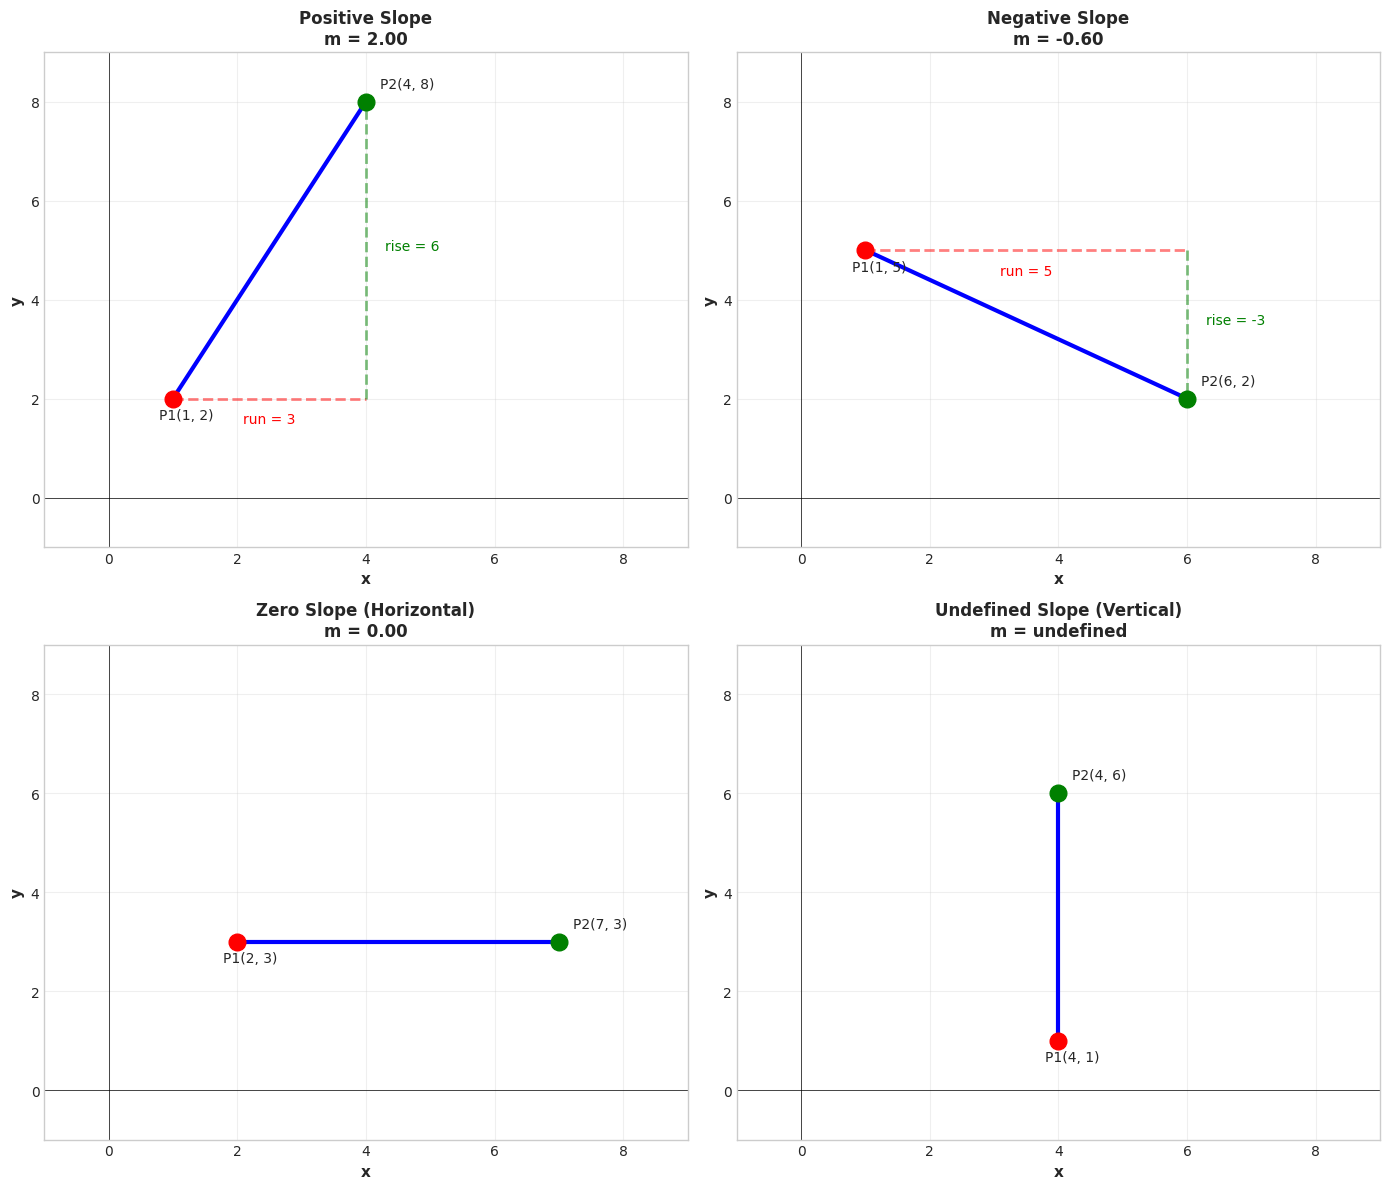

In [21]:
# Visualization: Different Types of Slopes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

slopes_to_plot = [
    ((1, 2), (4, 8), axes[0, 0], "Positive Slope"),
    ((1, 5), (6, 2), axes[0, 1], "Negative Slope"),
    ((2, 3), (7, 3), axes[1, 0], "Zero Slope (Horizontal)"),
    ((4, 1), (4, 6), axes[1, 1], "Undefined Slope (Vertical)")
]

for p1, p2, ax, title in slopes_to_plot:
    slope = calculate_slope(p1, p2)
    
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-', linewidth=3)
    ax.plot(*p1, 'ro', markersize=12)
    ax.plot(*p2, 'go', markersize=12)
    
    # Draw rise and run
    if slope != float('inf') and slope != 0:
        ax.plot([p1[0], p2[0]], [p1[1], p1[1]], 'r--', alpha=0.5, linewidth=2)
        ax.plot([p2[0], p2[0]], [p1[1], p2[1]], 'g--', alpha=0.5, linewidth=2)
        ax.text((p1[0] + p2[0])/2, p1[1] - 0.5, f'run = {p2[0] - p1[0]}', 
               ha='center', fontsize=10, color='red')
        ax.text(p2[0] + 0.3, (p1[1] + p2[1])/2, f'rise = {p2[1] - p1[1]}', 
               ha='left', fontsize=10, color='green')
    
    ax.annotate(f'P1{p1}', p1, xytext=(-10, -15), textcoords='offset points', fontsize=10)
    ax.annotate(f'P2{p2}', p2, xytext=(10, 10), textcoords='offset points', fontsize=10)
    
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x', fontsize=11, fontweight='bold')
    ax.set_ylabel('y', fontsize=11, fontweight='bold')
    
    if slope == float('inf'):
        ax.set_title(f'{title}\nm = undefined', fontsize=12, fontweight='bold')
    else:
        ax.set_title(f'{title}\nm = {slope:.2f}', fontsize=12, fontweight='bold')
    
    ax.set_xlim(-1, 9)
    ax.set_ylim(-1, 9)

plt.tight_layout()
plt.show()

## 4. Parallel and Perpendicular Lines

### Parallel Lines
Two lines are **parallel** if they have the same slope and never intersect.

**Condition**: $m_1 = m_2$

Lines $y = m_1x + b_1$ and $y = m_2x + b_2$ are parallel if $m_1 = m_2$ and $b_1 \neq b_2$

### Perpendicular Lines
Two lines are **perpendicular** if they intersect at a right angle (90°).

**Condition**: $m_1 \cdot m_2 = -1$ or $m_2 = -\frac{1}{m_1}$

The slopes are **negative reciprocals** of each other.

### Special Cases
- Horizontal line ($m = 0$) is perpendicular to vertical line (undefined slope)
- Two horizontal lines are parallel
- Two vertical lines are parallel

### Finding Parallel/Perpendicular Lines
**Given line**: $y = mx + b$
- **Parallel line through point $(x_0, y_0)$**: $y - y_0 = m(x - x_0)$
- **Perpendicular line through point $(x_0, y_0)$**: $y - y_0 = -\frac{1}{m}(x - x_0)$

### Data Science Applications
- **Principal Component Analysis (PCA)**: Orthogonal (perpendicular) components maximize variance
- **Gradient Descent**: Gradient is perpendicular to contour lines of cost function
- **Support Vector Machines**: Decision boundaries and perpendicular margin lines
- **Feature Engineering**: Creating independent (orthogonal) features reduces multicollinearity
- **Computer Graphics**: Surface normals are perpendicular to tangent planes

PARALLEL AND PERPENDICULAR LINES

Line Relationship Tests:
  m₁ =  2.00, m₂ =   2.00 → Parallel        (Expected: Parallel)
  m₁ =  3.00, m₂ =  -0.33 → Perpendicular   (Expected: Perpendicular)
  m₁ =  0.50, m₂ =  -2.00 → Perpendicular   (Expected: Perpendicular)
  m₁ = -1.00, m₂ =  -1.00 → Parallel        (Expected: Parallel)
  m₁ =  2.00, m₂ =   3.00 → Neither         (Expected: Neither)

✓ Perpendicular slopes are negative reciprocals:
  m₁ = 2, m₂ = -0.5
  m₁ × m₂ = 2 × -0.5 = -1.0


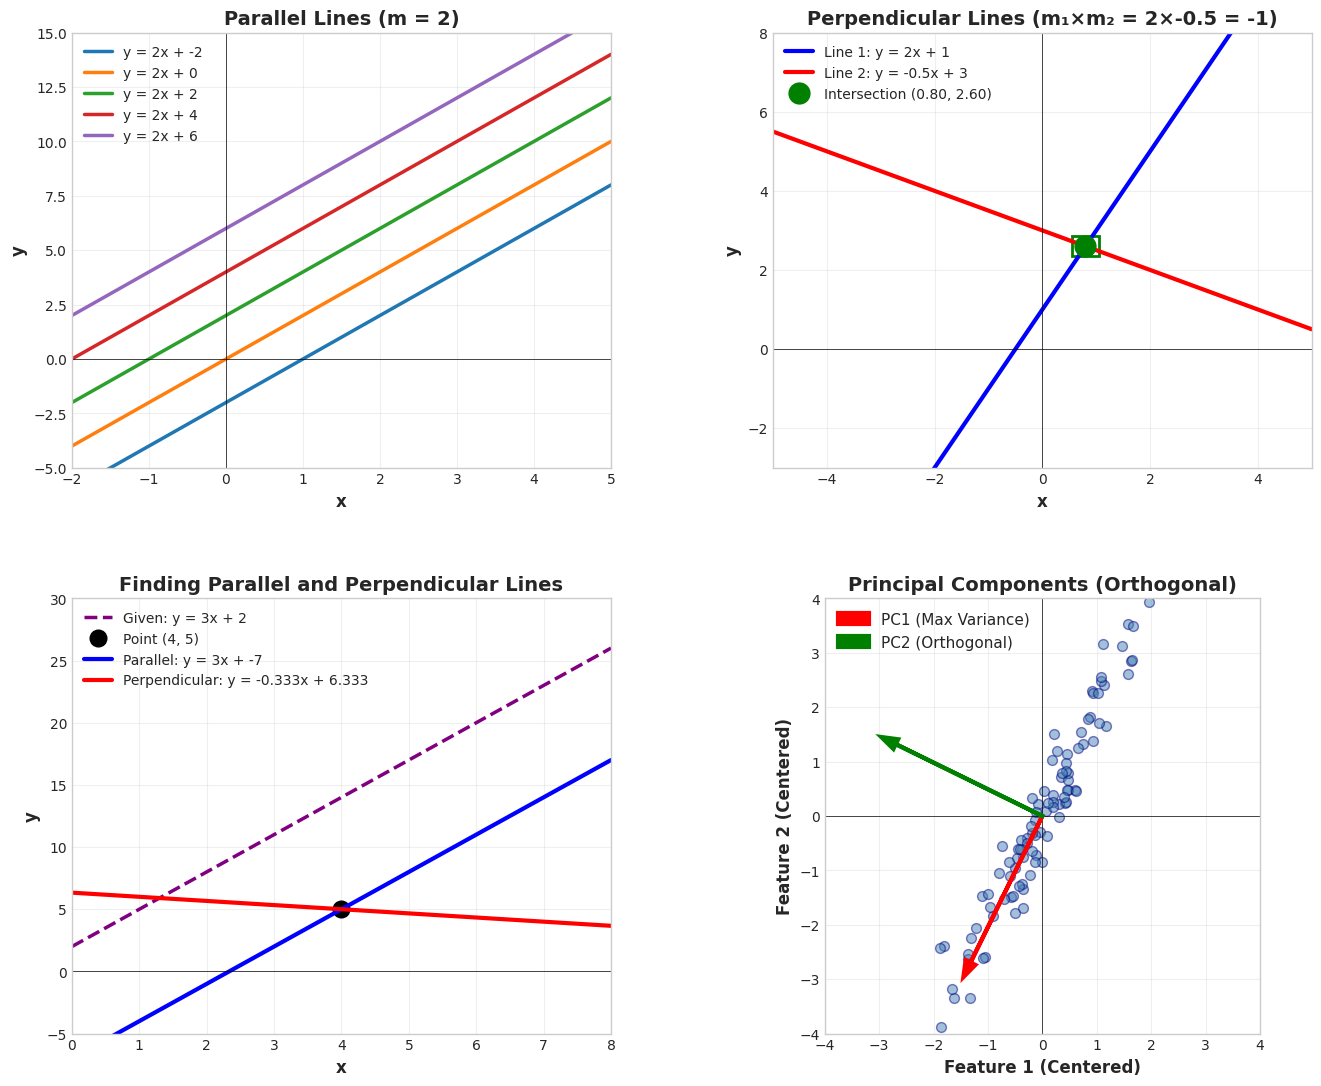


Principal Component Analysis:
  PC1 slope: 2.0402
  PC2 slope: -0.4901
  Product: -1.0000 ≈ -1 (perpendicular!)
  Eigenvalue 1: 4.0697 (explains 98.9% variance)
  Eigenvalue 2: 0.0452 (explains 1.1% variance)

🎯 Key Insights:
   • Parallel lines: Same slope, never intersect (m₁ = m₂)
   • Perpendicular lines: Negative reciprocal slopes (m₁ × m₂ = -1)
   • PCA finds orthogonal directions of maximum variance
   • Orthogonality reduces correlation between features


In [ ]:
# Parallel and Perpendicular Lines - Functions and Tests

print("=" * 70)
print("PARALLEL AND PERPENDICULAR LINES")
print("=" * 70)

# Functions to check line relationships
def are_parallel(m1, m2):
    """Check if two lines with slopes m1 and m2 are parallel"""
    return np.isclose(m1, m2)

def are_perpendicular(m1, m2):
    """Check if two lines with slopes m1 and m2 are perpendicular"""
    if m1 == 0 or m2 == 0:
        return False
    return np.isclose(m1 * m2, -1)

def find_parallel_line(m, point):
    """Find equation of line parallel to y=mx passing through point"""
    x0, y0 = point
    b = y0 - m * x0
    return m, b

def find_perpendicular_line(m, point):
    """Find equation of line perpendicular to y=mx passing through point"""
    x0, y0 = point
    m_perp = -1 / m
    b = y0 - m_perp * x0
    return m_perp, b

# Test cases
print("\nLine Relationship Tests:")
test_cases = [
    (2, 2, "Parallel"),
    (3, -1/3, "Perpendicular"),
    (1/2, -2, "Perpendicular"),
    (-1, -1, "Parallel"),
    (2, 3, "Neither")
]

for m1, m2, expected in test_cases:
    if are_parallel(m1, m2):
        result = "Parallel"
    elif are_perpendicular(m1, m2):
        result = "Perpendicular"
    else:
        result = "Neither"
    print(f"  m₁ = {m1:5.2f}, m₂ = {m2:6.2f} → {result:15} (Expected: {expected})")

In [ ]:
# Parallel and Perpendicular Lines - Comprehensive Visualization

# Visualize parallel and perpendicular lines
fig = plt.figure(figsize=(16, 13))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Parallel Lines Family
ax1 = fig.add_subplot(gs[0, 0])
x = np.linspace(-2, 5, 100)
slope = 2

for b in [-2, 0, 2, 4, 6]:
    y = slope * x + b
    ax1.plot(x, y, linewidth=2.5, label=f'y = {slope}x + {b}')

ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title(f'Parallel Lines (m = {slope})', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(-2, 5)
ax1.set_ylim(-5, 15)

# Plot 2: Perpendicular Lines with Right Angle
ax2 = fig.add_subplot(gs[0, 1])
x = np.linspace(-5, 5, 100)

m1 = 2
b1 = 1
y1 = m1 * x + b1
ax2.plot(x, y1, 'b-', linewidth=3, label=f'Line 1: y = {m1}x + {b1}')

m2 = -1/m1
b2 = 3
y2 = m2 * x + b2
ax2.plot(x, y2, 'r-', linewidth=3, label=f'Line 2: y = {m2}x + {b2}')

# Find and mark intersection
x_intersect = (b2 - b1) / (m1 - m2)
y_intersect = m1 * x_intersect + b1
ax2.plot(x_intersect, y_intersect, 'go', markersize=15, 
        label=f'Intersection ({x_intersect:.2f}, {y_intersect:.2f})')

# Draw right angle indicator
from matplotlib.patches import Rectangle
angle_size = 0.5
angle_box = Rectangle((x_intersect - angle_size/2, y_intersect - angle_size/2),
                     angle_size, angle_size, fill=False, edgecolor='green', linewidth=2)
ax2.add_patch(angle_box)

ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title(f'Perpendicular Lines (m₁×m₂ = {m1}×{m2} = -1)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-3, 8)

print(f"\n✓ Perpendicular slopes are negative reciprocals:")
print(f"  m₁ = {m1}, m₂ = {m2}")
print(f"  m₁ × m₂ = {m1} × {m2} = {m1 * m2}")

# Plot 3: Finding Lines Through a Point
ax3 = fig.add_subplot(gs[1, 0])
x = np.linspace(0, 8, 100)

# Given line
m_given = 3
b_given = 2
y_given = m_given * x + b_given
ax3.plot(x, y_given, 'purple', linewidth=2.5, label='Given: y = 3x + 2', linestyle='--')

# Point
point = (4, 5)
ax3.plot(point[0], point[1], 'ko', markersize=12, label=f'Point {point}')

# Parallel line through point
m_par, b_par = find_parallel_line(m_given, point)
y_par = m_par * x + b_par
ax3.plot(x, y_par, 'b-', linewidth=3, label=f'Parallel: y = {m_par}x + {b_par}')

# Perpendicular line through point
m_perp, b_perp = find_perpendicular_line(m_given, point)
y_perp = m_perp * x + b_perp
ax3.plot(x, y_perp, 'r-', linewidth=3, label=f'Perpendicular: y = {m_perp:.3f}x + {b_perp:.3f}')

ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=12, fontweight='bold')
ax3.set_ylabel('y', fontsize=12, fontweight='bold')
ax3.set_title('Finding Parallel and Perpendicular Lines', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.set_xlim(0, 8)
ax3.set_ylim(-5, 30)

# Plot 4: PCA - Orthogonal Components
ax4 = fig.add_subplot(gs[1, 1])

# Generate correlated data
np.random.seed(42)
n = 100
x_data = np.random.randn(n)
y_data = 2 * x_data + np.random.randn(n) * 0.5

# Center the data
mean_x = np.mean(x_data)
mean_y = np.mean(y_data)
x_centered = x_data - mean_x
y_centered = y_data - mean_y

# Calculate principal components
cov_matrix = np.cov(x_centered, y_centered)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Plot data
ax4.scatter(x_centered, y_centered, alpha=0.5, s=50, c='steelblue', edgecolors='navy')

# Draw principal components
scale = 3
ax4.arrow(0, 0, scale * eigenvectors[0, 0], scale * eigenvectors[1, 0],
        head_width=0.2, head_length=0.3, fc='red', ec='red', linewidth=3,
        label='PC1 (Max Variance)', zorder=5)
ax4.arrow(0, 0, scale * eigenvectors[0, 1], scale * eigenvectors[1, 1],
        head_width=0.2, head_length=0.3, fc='green', ec='green', linewidth=3,
        label='PC2 (Orthogonal)', zorder=5)

# Calculate slopes
pc1_slope = eigenvectors[1, 0] / eigenvectors[0, 0]
pc2_slope = eigenvectors[1, 1] / eigenvectors[0, 1]

ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.axvline(x=0, color='k', linewidth=0.5)
ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Feature 1 (Centered)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Feature 2 (Centered)', fontsize=12, fontweight='bold')
ax4.set_title('Principal Components (Orthogonal)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11)
ax4.set_aspect('equal')
ax4.set_xlim(-4, 4)
ax4.set_ylim(-4, 4)

plt.show()

print(f"\nPrincipal Component Analysis:")
print(f"  PC1 slope: {pc1_slope:.4f}")
print(f"  PC2 slope: {pc2_slope:.4f}")
print(f"  Product: {pc1_slope * pc2_slope:.4f} ≈ -1 (perpendicular!)")
print(f"  Eigenvalue 1: {eigenvalues[0]:.4f} (explains {eigenvalues[0]/(eigenvalues[0]+eigenvalues[1])*100:.1f}% variance)")
print(f"  Eigenvalue 2: {eigenvalues[1]:.4f} (explains {eigenvalues[1]/(eigenvalues[0]+eigenvalues[1])*100:.1f}% variance)")

In [ ]:
# Parallel and Perpendicular Lines - Key Insights

print("\n🎯 Key Insights:")
print("   • Parallel lines: Same slope, never intersect (m₁ = m₂)")
print("   • Perpendicular lines: Negative reciprocal slopes (m₁ × m₂ = -1)")
print("   • PCA finds orthogonal directions of maximum variance")
print("   • Orthogonality reduces correlation between features")

## 5. Applications in Linear Models and Data Science

### Linear Regression
Linear regression models the relationship between variables using a straight line.

**Simple Linear Regression**: $y = mx + b + \epsilon$
- $y$: Response variable (dependent)
- $x$: Predictor variable (independent)
- $m$: Slope (how much $y$ changes per unit change in $x$)
- $b$: Y-intercept (value of $y$ when $x = 0$)
- $\epsilon$: Error term (residuals)

### Least Squares Method
Finds the line that **minimizes the sum of squared residuals**:

$$\text{SSE} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (mx_i + b))^2$$

**Optimal solutions**:
$$m = \frac{n\sum xy - \sum x \sum y}{n\sum x^2 - (\sum x)^2}$$

$$b = \frac{\sum y - m\sum x}{n}$$

### Model Evaluation Metrics
- **R² (Coefficient of Determination)**: Proportion of variance explained (0 to 1)
- **MSE (Mean Squared Error)**: $\frac{1}{n}\sum(y_i - \hat{y}_i)^2$
- **RMSE (Root Mean Squared Error)**: $\sqrt{\text{MSE}}$
- **MAE (Mean Absolute Error)**: $\frac{1}{n}\sum|y_i - \hat{y}_i|$

### Multiple Linear Regression
Extends to multiple predictors:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p + \epsilon$$

### Data Science Applications
- **Predictive Modeling**: Sales forecasting, price prediction, demand estimation
- **Feature Importance**: Slope magnitude indicates feature impact
- **Trend Analysis**: Identifying patterns in time series data
- **A/B Testing**: Comparing treatment effects
- **Causal Inference**: Understanding relationships between variables
- **Anomaly Detection**: Points far from regression line are outliers

LINEAR REGRESSION AND MODEL EVALUATION

Dataset: 100 houses
  Size range: 812 - 2971 sqft
  Price range: $157.3k - $519.1k

Linear Regression Results:
  Equation: Price = 61.47 + 0.1437 × Size
  Slope (m): $0.1437k per sqft
  Intercept (b): $61.47k (base price)

Model Performance:
  R² Score: 0.9235 (92.35% variance explained)
  RMSE: $26.94k
  MAE: $21.03k


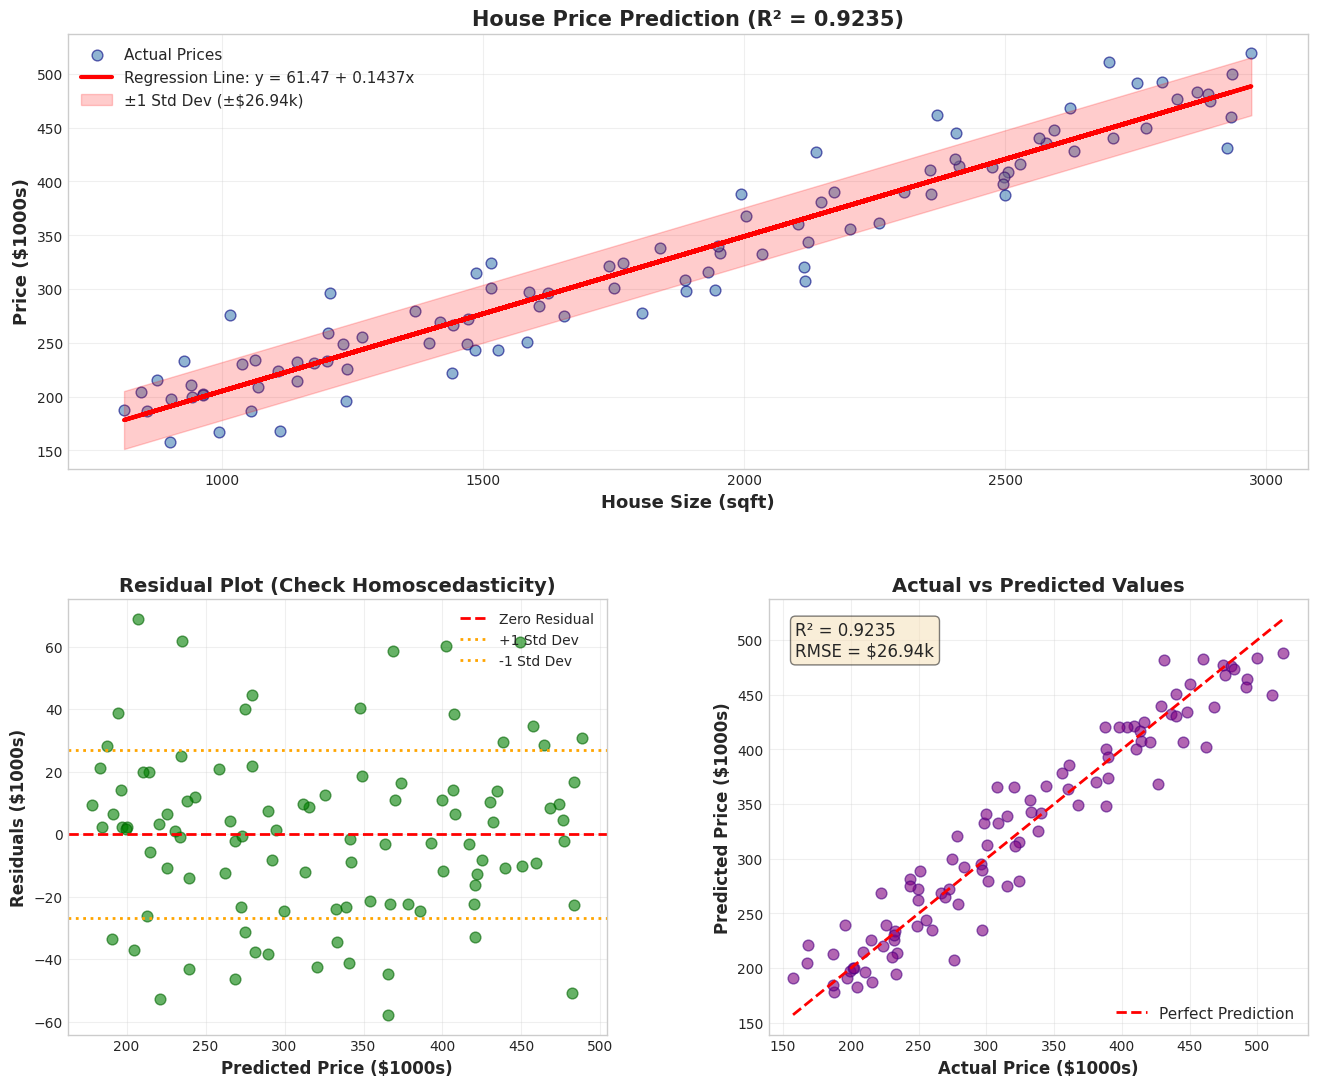


MULTIPLE LINEAR REGRESSION

Multiple Regression Equation:
  Price = 204.55 + 0.1178×Size + -2.0773×Age + -2.8022×Distance

Coefficient Interpretation:
  Intercept: $204.55k (base price)
  Size: $0.1178k per sqft (positive impact)
  Age: $-2.0773k per year (negative impact)
  Distance: $-2.8022k per mile (negative impact)

Model Performance:
  R² Score: 0.9486 (94.86% variance explained)
  RMSE: $19.78k


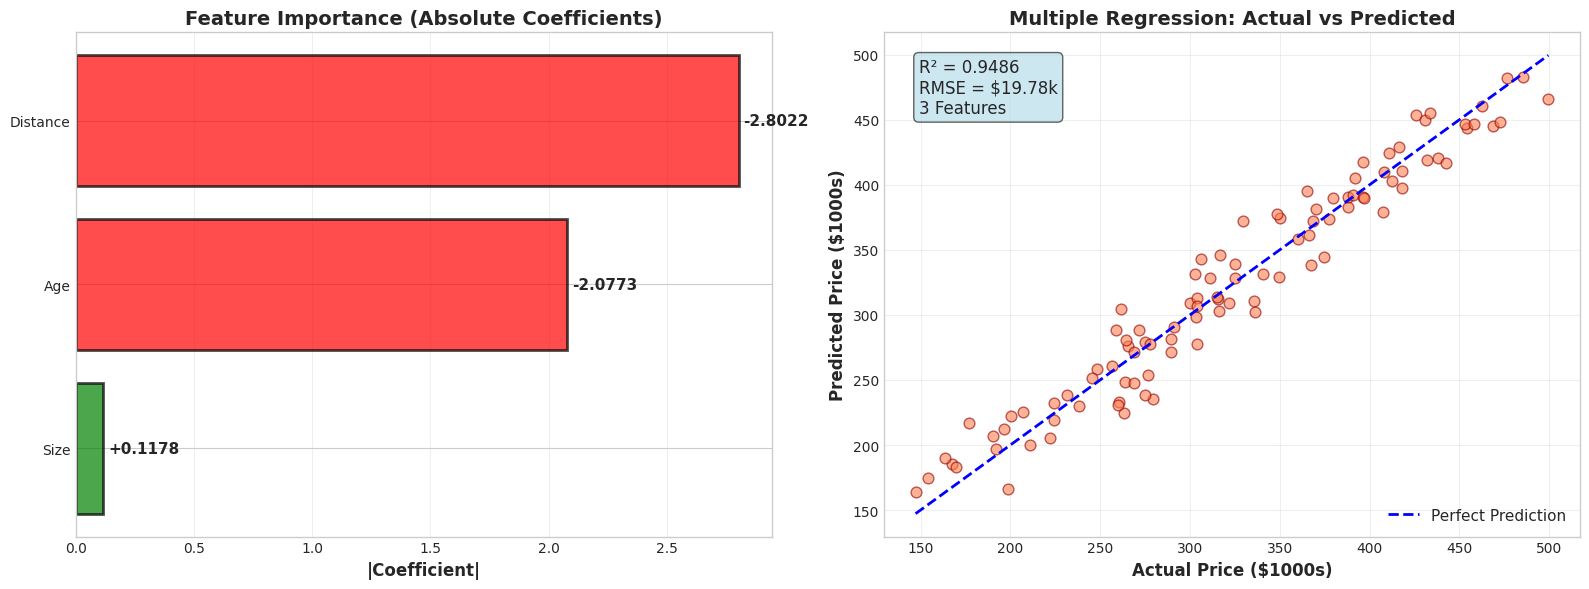


🎯 Key Takeaways:
   • Linear regression finds best-fit line minimizing squared errors
   • R² measures goodness of fit (higher is better)
   • Residual plots check model assumptions
   • Multiple regression handles multiple predictors simultaneously
   • Feature coefficients indicate impact direction and magnitude


In [ ]:
# Applications in Linear Models - Simple Linear Regression

print("=" * 70)
print("LINEAR REGRESSION AND MODEL EVALUATION")
print("=" * 70)

# Generate sample data - House prices
np.random.seed(42)
n_samples = 100

# House size (square feet) and price (thousands)
house_size = np.random.uniform(800, 3000, n_samples)
noise = np.random.normal(0, 30, n_samples)
house_price = 50 + 0.15 * house_size + noise  # True relationship: price = 50 + 0.15*size

# Create DataFrame
df = pd.DataFrame({
    'Size_sqft': house_size,
    'Price_k': house_price
})

print(f"\nDataset: {n_samples} houses")
print(f"  Size range: {house_size.min():.0f} - {house_size.max():.0f} sqft")
print(f"  Price range: ${house_price.min():.1f}k - ${house_price.max():.1f}k")

# Perform linear regression using numpy
X = house_size
y = house_price
n = len(X)

# Calculate slope and intercept using least squares formulas
m = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / (n * np.sum(X**2) - (np.sum(X))**2)
b = (np.sum(y) - m * np.sum(X)) / n

# Predictions
y_pred = m * X + b

# Calculate metrics
residuals = y - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))

print(f"\nLinear Regression Results:")
print(f"  Equation: Price = {b:.2f} + {m:.4f} × Size")
print(f"  Slope (m): ${m:.4f}k per sqft")
print(f"  Intercept (b): ${b:.2f}k (base price)")
print(f"\nModel Performance:")
print(f"  R² Score: {r_squared:.4f} ({r_squared*100:.2f}% variance explained)")
print(f"  RMSE: ${rmse:.2f}k")
print(f"  MAE: ${mae:.2f}k")

In [ ]:
# Simple Linear Regression - Comprehensive Visualization

# Visualizations
fig = plt.figure(figsize=(16, 13))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Regression Line with Confidence Band
ax1 = fig.add_subplot(gs[0, :])

ax1.scatter(X, y, alpha=0.6, s=60, c='steelblue', edgecolors='navy', label='Actual Prices')
ax1.plot(X, y_pred, 'r-', linewidth=3, label=f'Regression Line: y = {b:.2f} + {m:.4f}x')

# Add confidence band (±1 standard deviation of residuals)
std_residuals = np.std(residuals)
ax1.fill_between(sorted(X), 
                 m * np.array(sorted(X)) + b - std_residuals,
                 m * np.array(sorted(X)) + b + std_residuals,
                 alpha=0.2, color='red', label=f'±1 Std Dev (±${std_residuals:.2f}k)')

ax1.set_xlabel('House Size (sqft)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Price ($1000s)', fontsize=13, fontweight='bold')
ax1.set_title(f'House Price Prediction (R² = {r_squared:.4f})', fontsize=15, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals Plot
ax2 = fig.add_subplot(gs[1, 0])

ax2.scatter(y_pred, residuals, alpha=0.6, s=60, c='green', edgecolors='darkgreen')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Zero Residual')
ax2.axhline(y=std_residuals, color='orange', linestyle=':', linewidth=2, label='+1 Std Dev')
ax2.axhline(y=-std_residuals, color='orange', linestyle=':', linewidth=2, label='-1 Std Dev')

ax2.set_xlabel('Predicted Price ($1000s)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals ($1000s)', fontsize=12, fontweight='bold')
ax2.set_title('Residual Plot (Check Homoscedasticity)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Actual vs Predicted
ax3 = fig.add_subplot(gs[1, 1])

ax3.scatter(y, y_pred, alpha=0.6, s=60, c='purple', edgecolors='indigo')
perfect_line = np.linspace(y.min(), y.max(), 100)
ax3.plot(perfect_line, perfect_line, 'r--', linewidth=2, label='Perfect Prediction')

ax3.set_xlabel('Actual Price ($1000s)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Predicted Price ($1000s)', fontsize=12, fontweight='bold')
ax3.set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)

# Add R² annotation
ax3.text(0.05, 0.95, f'R² = {r_squared:.4f}\nRMSE = ${rmse:.2f}k', 
         transform=ax3.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

In [ ]:
# Multiple Linear Regression - Setup and Analysis

print("\n" + "=" * 70)
print("MULTIPLE LINEAR REGRESSION")
print("=" * 70)

# Add more features
df['Age_years'] = np.random.uniform(0, 50, n_samples)
df['Distance_to_city'] = np.random.uniform(1, 30, n_samples)

# True relationship: Price = 200 + 0.12*Size - 2*Age - 3*Distance + noise
df['Price_k_multi'] = (200 + 0.12 * df['Size_sqft'] - 
                       2 * df['Age_years'] - 
                       3 * df['Distance_to_city'] + 
                       np.random.normal(0, 20, n_samples))

# Fit using scipy
from scipy import stats

# Design matrix
X_multi = np.column_stack([np.ones(n_samples), df['Size_sqft'], 
                           df['Age_years'], df['Distance_to_city']])
y_multi = df['Price_k_multi'].values

# Solve using least squares: β = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_multi.T @ X_multi) @ X_multi.T @ y_multi

# Predictions
y_pred_multi = X_multi @ beta

# Metrics
r2_multi = 1 - np.sum((y_multi - y_pred_multi)**2) / np.sum((y_multi - np.mean(y_multi))**2)
rmse_multi = np.sqrt(np.mean((y_multi - y_pred_multi)**2))

print(f"\nMultiple Regression Equation:")
print(f"  Price = {beta[0]:.2f} + {beta[1]:.4f}×Size + {beta[2]:.4f}×Age + {beta[3]:.4f}×Distance")
print(f"\nCoefficient Interpretation:")
print(f"  Intercept: ${beta[0]:.2f}k (base price)")
print(f"  Size: ${beta[1]:.4f}k per sqft (positive impact)")
print(f"  Age: ${beta[2]:.4f}k per year (negative impact)")
print(f"  Distance: ${beta[3]:.4f}k per mile (negative impact)")
print(f"\nModel Performance:")
print(f"  R² Score: {r2_multi:.4f} ({r2_multi*100:.2f}% variance explained)")
print(f"  RMSE: ${rmse_multi:.2f}k")

In [ ]:
# Multiple Linear Regression - Visualization

# Feature importance visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Coefficient magnitudes
features = ['Size', 'Age', 'Distance']
coefficients = beta[1:]
colors = ['green' if c > 0 else 'red' for c in coefficients]

ax1.barh(features, np.abs(coefficients), color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_xlabel('|Coefficient|', fontsize=12, fontweight='bold')
ax1.set_title('Feature Importance (Absolute Coefficients)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, (feat, coef) in enumerate(zip(features, coefficients)):
    sign = '+' if coef > 0 else ''
    ax1.text(np.abs(coef) + 0.02, i, f'{sign}{coef:.4f}', 
            va='center', fontsize=11, fontweight='bold')

# Plot 2: Actual vs Predicted (Multiple Regression)
ax2.scatter(y_multi, y_pred_multi, alpha=0.6, s=60, c='coral', edgecolors='darkred')
perfect = np.linspace(y_multi.min(), y_multi.max(), 100)
ax2.plot(perfect, perfect, 'b--', linewidth=2, label='Perfect Prediction')

ax2.set_xlabel('Actual Price ($1000s)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Predicted Price ($1000s)', fontsize=12, fontweight='bold')
ax2.set_title('Multiple Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

ax2.text(0.05, 0.95, f'R² = {r2_multi:.4f}\nRMSE = ${rmse_multi:.2f}k\n3 Features', 
        transform=ax2.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.6))

plt.tight_layout()
plt.show()

In [ ]:
# Linear Regression Applications - Key Takeaways

print("\n🎯 Key Takeaways:")
print("   • Linear regression finds best-fit line minimizing squared errors")
print("   • R² measures goodness of fit (higher is better)")
print("   • Residual plots check model assumptions")
print("   • Multiple regression handles multiple predictors simultaneously")
print("   • Feature coefficients indicate impact direction and magnitude")

## 6. Practice Problems

### Problem 1: Coordinate Geometry Basics
**Given**: Points $A = (2, 3)$ and $B = (8, 11)$

Find:
1. Distance between $A$ and $B$
2. Midpoint of segment $AB$
3. Slope of line through $A$ and $B$
4. Equation of line $AB$ in slope-intercept form
5. Point $C$ on line $AB$ such that $AC:CB = 1:2$

### Problem 2: Parallel and Perpendicular Lines
**Given**: Line $L: 3x + 4y = 12$ and point $P = (5, 2)$

Find:
1. Slope of line $L$
2. Equation of line parallel to $L$ passing through $P$
3. Equation of line perpendicular to $L$ passing through $P$
4. Distance from point $P$ to line $L$

### Problem 3: Real-World Linear Regression
**Scenario**: A company's sales data over 10 months:

| Month | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|-------|---|---|---|---|---|---|---|---|---|----|
| Sales ($k) | 12 | 15 | 18 | 22 | 25 | 28 | 31 | 35 | 38 | 42 |

Tasks:
1. Perform linear regression (Month vs Sales)
2. Calculate $R^2$ score
3. Predict sales for month 12
4. Interpret the slope in business terms
5. Create visualization with regression line

PRACTICE PROBLEMS - SOLUTIONS

PROBLEM 1: COORDINATE GEOMETRY

Given: A = [2 3], B = [ 8 11]

1. Distance AB:
   d = √[(8-2)² + (11-3)²]
   d = √[36 + 64]
   d = √100 = 10.0

2. Midpoint:
   M = ((2+8)/2, (3+11)/2)
   M = [5. 7.]

3. Slope:
   m = (11-3)/(8-2)
   m = 8/6 = 1.3333

4. Equation (slope-intercept form):
   y - 3 = 1.3333(x - 2)
   y = 1.3333x + 0.3333

5. Point C dividing AB in ratio 1:2:
   C = A + (1/3)(B - A)
   C = [4.         5.66666667]

PROBLEM 2: PARALLEL AND PERPENDICULAR LINES

Given: Line L: 3x + 4y = 12, Point P = [5 2]

1. Slope of L:
   4y = -3x + 12
   y = -0.75x + 3
   m = -0.75

2. Parallel line through P:
   m = -0.75 (same slope)
   y - 2 = -0.75(x - 5)
   y = -0.75x + 5.75

3. Perpendicular line through P:
   m = 1.3333 (negative reciprocal)
   y - 2 = 1.3333(x - 5)
   y = 1.3333x + -4.6667

4. Distance from P to L:
   d = |3(5) + 4(2) - 12| / √(3² + 4²)
   d = |15 + 8 - 12| / √25
   d = |11| / 5 = 2.2


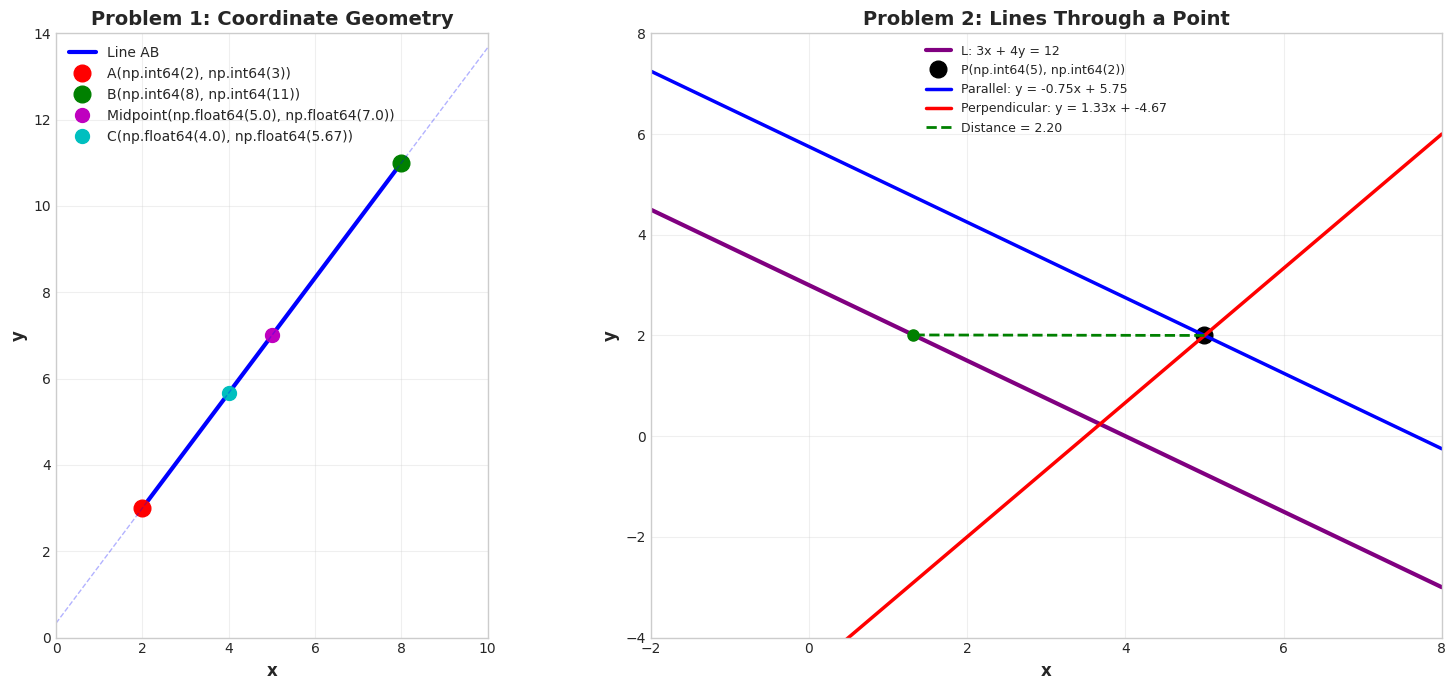


PROBLEM 3: SALES PREDICTION (LINEAR REGRESSION)

Data: 10 months of sales
  Months: [ 1  2  3  4  5  6  7  8  9 10]
  Sales ($k): [12 15 18 22 25 28 31 35 38 42]

1. Linear Regression Results:
   Sales = 8.40 + 3.31 × Month

2. R² Score: 0.9989 (99.89% variance explained)

3. Sales prediction for month 12:
   Sales(12) = 8.40 + 3.31 × 12
   Sales(12) = $48.11k

4. Business Interpretation of Slope:
   Slope m = 3.31
   → Sales increase by $3.31k per month
   → Annual growth rate: $39.71k per year
   → 12.4% monthly growth rate


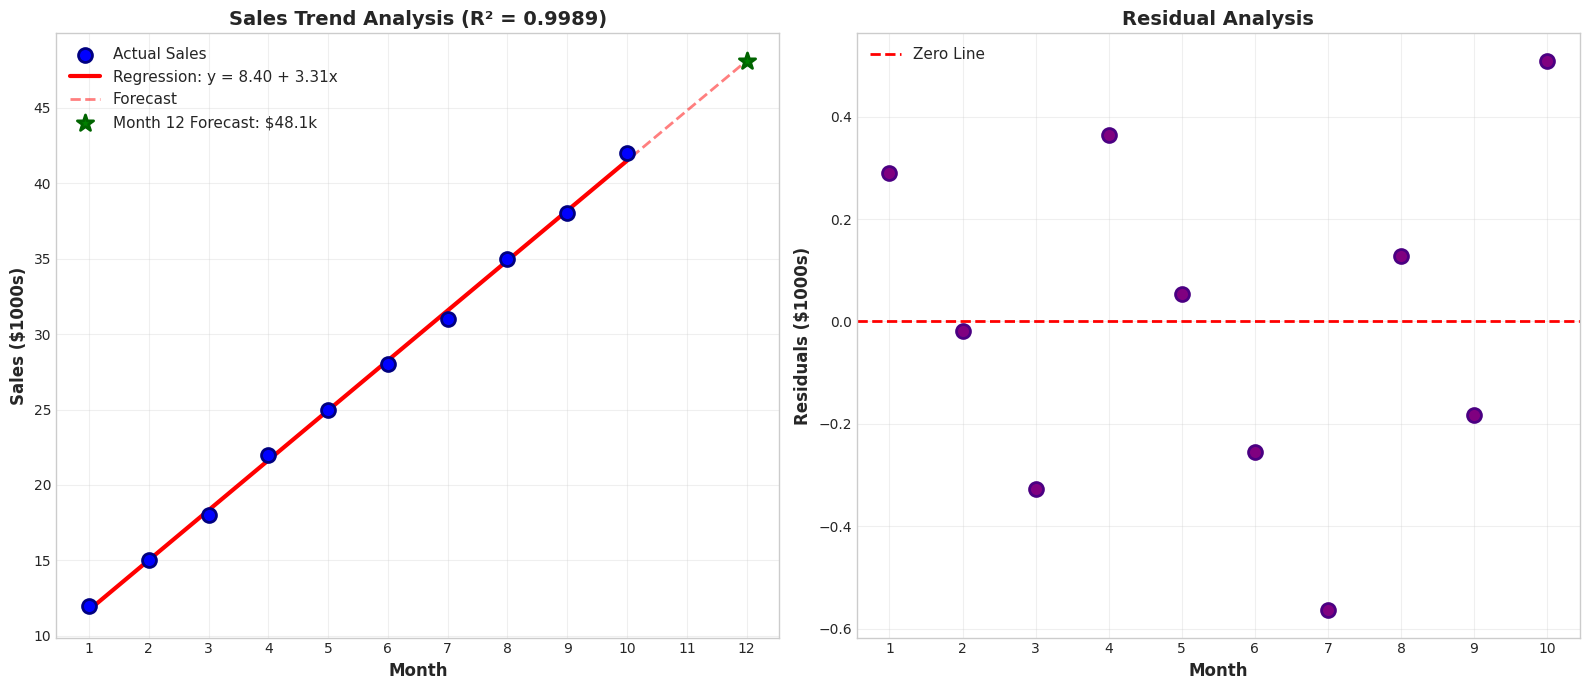


5. Model Quality Assessment:
   • High R² (0.9989) indicates strong linear relationship
   • Residuals appear randomly distributed (good sign)
   • Model is reliable for short-term forecasting
   • Caution: Extrapolation beyond observed range increases uncertainty

✅ ALL PROBLEMS COMPLETED


In [ ]:
# Practice Problem 1: Coordinate Geometry Basics

print("=" * 70)
print("PRACTICE PROBLEMS - SOLUTIONS")
print("=" * 70)

# Problem 1: Coordinate Geometry Basics
print("\n" + "=" * 70)
print("PROBLEM 1: COORDINATE GEOMETRY")
print("=" * 70)

A = np.array([2, 3])
B = np.array([8, 11])

print(f"\nGiven: A = {A}, B = {B}")

# 1. Distance
distance_AB = np.sqrt((B[0] - A[0])**2 + (B[1] - A[1])**2)
print(f"\n1. Distance AB:")
print(f"   d = √[(8-2)² + (11-3)²]")
print(f"   d = √[36 + 64]")
print(f"   d = √100 = {distance_AB}")

# 2. Midpoint
midpoint_AB = (A + B) / 2
print(f"\n2. Midpoint:")
print(f"   M = ((2+8)/2, (3+11)/2)")
print(f"   M = {midpoint_AB}")

# 3. Slope
slope_AB = (B[1] - A[1]) / (B[0] - A[0])
print(f"\n3. Slope:")
print(f"   m = (11-3)/(8-2)")
print(f"   m = 8/6 = {slope_AB:.4f}")

# 4. Equation
b_AB = A[1] - slope_AB * A[0]
print(f"\n4. Equation (slope-intercept form):")
print(f"   y - 3 = {slope_AB:.4f}(x - 2)")
print(f"   y = {slope_AB:.4f}x + {b_AB:.4f}")

# 5. Point C dividing AB in ratio 1:2
# C = A + (1/3)(B - A)
C = A + (1/3) * (B - A)
print(f"\n5. Point C dividing AB in ratio 1:2:")
print(f"   C = A + (1/3)(B - A)")
print(f"   C = {C}")

# Visualization
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# All elements
ax1.plot([A[0], B[0]], [A[1], B[1]], 'b-', linewidth=3, label='Line AB')
ax1.plot(A[0], A[1], 'ro', markersize=12, label=f'A{tuple(A)}')
ax1.plot(B[0], B[1], 'go', markersize=12, label=f'B{tuple(B)}')
ax1.plot(midpoint_AB[0], midpoint_AB[1], 'mo', markersize=10, label=f'Midpoint{tuple(midpoint_AB)}')
ax1.plot(C[0], C[1], 'co', markersize=10, label=f'C{tuple(np.round(C, 2))}')

# Extend line
x_extended = np.linspace(0, 10, 100)
y_extended = slope_AB * x_extended + b_AB
ax1.plot(x_extended, y_extended, 'b--', alpha=0.3, linewidth=1)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Problem 1: Coordinate Geometry', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_aspect('equal')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 14)

plt.tight_layout()
plt.show()

In [ ]:
# Practice Problem 2: Parallel and Perpendicular Lines

print("\n" + "=" * 70)
print("PROBLEM 2: PARALLEL AND PERPENDICULAR LINES")
print("=" * 70)

# Given: 3x + 4y = 12, point P = (5, 2)
# Rewrite in slope-intercept form: y = -3x/4 + 3
P = np.array([5, 2])
m_L = -3/4
b_L = 3

print(f"\nGiven: Line L: 3x + 4y = 12, Point P = {P}")
print(f"\n1. Slope of L:")
print(f"   4y = -3x + 12")
print(f"   y = -{3/4}x + 3")
print(f"   m = {m_L}")

# 2. Parallel line through P
m_parallel = m_L
b_parallel = P[1] - m_parallel * P[0]
print(f"\n2. Parallel line through P:")
print(f"   m = {m_parallel} (same slope)")
print(f"   y - 2 = {m_parallel}(x - 5)")
print(f"   y = {m_parallel}x + {b_parallel}")

# 3. Perpendicular line through P
m_perp = -1 / m_L
b_perp = P[1] - m_perp * P[0]
print(f"\n3. Perpendicular line through P:")
print(f"   m = {m_perp:.4f} (negative reciprocal)")
print(f"   y - 2 = {m_perp:.4f}(x - 5)")
print(f"   y = {m_perp:.4f}x + {b_perp:.4f}")

# 4. Distance from P to L
# Formula: d = |ax₀ + by₀ + c| / √(a² + b²)
# 3x + 4y - 12 = 0
distance_to_L = abs(3*P[0] + 4*P[1] - 12) / np.sqrt(3**2 + 4**2)
print(f"\n4. Distance from P to L:")
print(f"   d = |3(5) + 4(2) - 12| / √(3² + 4²)")
print(f"   d = |15 + 8 - 12| / √25")
print(f"   d = |11| / 5 = {distance_to_L}")

# Visualization
fig, ax2 = plt.subplots(1, 1, figsize=(12, 8))
x_range = np.linspace(-2, 8, 100)

# Original line L
y_L = m_L * x_range + b_L
ax2.plot(x_range, y_L, 'purple', linewidth=3, label='L: 3x + 4y = 12')

# Point P
ax2.plot(P[0], P[1], 'ko', markersize=12, label=f'P{tuple(P)}')

# Parallel line
y_parallel = m_parallel * x_range + b_parallel
ax2.plot(x_range, y_parallel, 'b-', linewidth=2.5, label=f'Parallel: y = {m_parallel}x + {b_parallel:.2f}')

# Perpendicular line
y_perp = m_perp * x_range + b_perp
ax2.plot(x_range, y_perp, 'r-', linewidth=2.5, label=f'Perpendicular: y = {m_perp:.2f}x + {b_perp:.2f}')

# Perpendicular from P to L (shortest distance)
# Find point on L closest to P
t = ((P[0] - 0) * 3 + (P[1] - 3) * 4) / (3**2 + 4**2)
closest_point = np.array([t * 3, 3 - t * 3 * 3/4])
ax2.plot([P[0], closest_point[0]], [P[1], closest_point[1]], 'g--', 
        linewidth=2, label=f'Distance = {distance_to_L:.2f}')
ax2.plot(closest_point[0], closest_point[1], 'go', markersize=8)

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Problem 2: Lines Through a Point', fontsize=14, fontweight='bold')
ax2.legend(fontsize=9)
ax2.set_xlim(-2, 8)
ax2.set_ylim(-4, 8)

plt.tight_layout()
plt.show()

In [ ]:
# Practice Problem 3: Sales Prediction (Linear Regression)

print("\n" + "=" * 70)
print("PROBLEM 3: SALES PREDICTION (LINEAR REGRESSION)")
print("=" * 70)

months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sales = np.array([12, 15, 18, 22, 25, 28, 31, 35, 38, 42])

print(f"\nData: {len(months)} months of sales")
print(f"  Months: {months}")
print(f"  Sales ($k): {sales}")

# Linear regression
n = len(months)
m_sales = (n * np.sum(months * sales) - np.sum(months) * np.sum(sales)) / \
          (n * np.sum(months**2) - (np.sum(months))**2)
b_sales = (np.sum(sales) - m_sales * np.sum(months)) / n

sales_pred = m_sales * months + b_sales

# R² calculation
ss_res = np.sum((sales - sales_pred)**2)
ss_tot = np.sum((sales - np.mean(sales))**2)
r2 = 1 - (ss_res / ss_tot)

# Prediction for month 12
month_12_pred = m_sales * 12 + b_sales

print(f"\n1. Linear Regression Results:")
print(f"   Sales = {b_sales:.2f} + {m_sales:.2f} × Month")

print(f"\n2. R² Score: {r2:.4f} ({r2*100:.2f}% variance explained)")

print(f"\n3. Sales prediction for month 12:")
print(f"   Sales(12) = {b_sales:.2f} + {m_sales:.2f} × 12")
print(f"   Sales(12) = ${month_12_pred:.2f}k")

print(f"\n4. Business Interpretation of Slope:")
print(f"   Slope m = {m_sales:.2f}")
print(f"   → Sales increase by ${m_sales:.2f}k per month")
print(f"   → Annual growth rate: ${m_sales * 12:.2f}k per year")
print(f"   → {(m_sales / np.mean(sales)) * 100:.1f}% monthly growth rate")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Regression with predictions
ax1.scatter(months, sales, s=100, c='blue', edgecolors='navy', linewidth=2,
           label='Actual Sales', zorder=5)
ax1.plot(months, sales_pred, 'r-', linewidth=3, 
        label=f'Regression: y = {b_sales:.2f} + {m_sales:.2f}x')

# Extend to month 12
extended_months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
extended_pred = m_sales * extended_months + b_sales
ax1.plot(extended_months, extended_pred, 'r--', linewidth=2, alpha=0.5,
        label='Forecast')

# Mark month 12 prediction
ax1.scatter([12], [month_12_pred], s=150, c='green', marker='*', 
           edgecolors='darkgreen', linewidth=2,
           label=f'Month 12 Forecast: ${month_12_pred:.1f}k', zorder=6)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sales ($1000s)', fontsize=12, fontweight='bold')
ax1.set_title(f'Sales Trend Analysis (R² = {r2:.4f})', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xticks(range(1, 13))

# Plot 2: Residuals
residuals = sales - sales_pred
ax2.scatter(months, residuals, s=100, c='purple', edgecolors='indigo', linewidth=2)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Zero Line')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals ($1000s)', fontsize=12, fontweight='bold')
ax2.set_title('Residual Analysis', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.set_xticks(range(1, 11))

plt.tight_layout()
plt.show()

print(f"\n5. Model Quality Assessment:")
print(f"   • High R² ({r2:.4f}) indicates strong linear relationship")
print(f"   • Residuals appear randomly distributed (good sign)")
print(f"   • Model is reliable for short-term forecasting")
print(f"   • Caution: Extrapolation beyond observed range increases uncertainty")

## 📚 Week 2 Summary: Coordinate Systems and Straight Lines

### 🎯 Core Concepts Mastered

#### 1. **Cartesian Coordinate System**
- **2D Coordinates**: Points represented as ordered pairs $(x, y)$
- **3D Coordinates**: Points as $(x, y, z)$ in three-dimensional space
- **Quadrants**: Four regions in 2D plane based on sign of coordinates
- **Coordinate Transformations**: Translation, rotation, scaling

#### 2. **Distance and Midpoint**
- **Distance Formula (2D)**: $d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$
- **Distance Formula (3D)**: $d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2}$
- **Midpoint Formula**: $M = \left(\frac{x_1+x_2}{2}, \frac{y_1+y_2}{2}\right)$
- **Applications**: Clustering algorithms, nearest neighbor search

#### 3. **Slope and Line Equations**
- **Slope**: $m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}$
- **Point-Slope Form**: $y - y_1 = m(x - x_1)$
- **Slope-Intercept Form**: $y = mx + b$
- **Standard Form**: $Ax + By = C$
- **Vertical Lines**: $x = k$ (undefined slope)
- **Horizontal Lines**: $y = k$ (slope = 0)

#### 4. **Parallel and Perpendicular Lines**
- **Parallel Condition**: $m_1 = m_2$
- **Perpendicular Condition**: $m_1 \cdot m_2 = -1$ (negative reciprocals)
- **Orthogonality**: Fundamental in PCA, optimization, linear algebra

#### 5. **Linear Regression**
- **Model**: $y = mx + b + \epsilon$
- **Least Squares**: Minimizes $\sum (y_i - \hat{y}_i)^2$
- **Evaluation Metrics**: $R^2$, MSE, RMSE, MAE
- **Applications**: Predictive modeling, trend analysis, forecasting

---

### 📐 Key Formulas Reference

| Concept | Formula | Notes |
|---------|---------|-------|
| **Distance (2D)** | $d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$ | Pythagorean theorem |
| **Midpoint** | $M = \left(\frac{x_1+x_2}{2}, \frac{y_1+y_2}{2}\right)$ | Average of coordinates |
| **Slope** | $m = \frac{y_2 - y_1}{x_2 - x_1}$ | Rise over run |
| **Point-Slope** | $y - y_1 = m(x - x_1)$ | Line through point with slope |
| **Slope-Intercept** | $y = mx + b$ | Most common form |
| **Parallel Lines** | $m_1 = m_2$ | Same slope |
| **Perpendicular** | $m_1 \times m_2 = -1$ | Negative reciprocals |
| **Regression Slope** | $m = \frac{n\sum xy - \sum x \sum y}{n\sum x^2 - (\sum x)^2}$ | Least squares |
| **R² Score** | $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ | Variance explained |

---

### 🔬 Data Science Applications

| Mathematical Concept | Data Science Application | Example |
|---------------------|-------------------------|---------|
| **Euclidean Distance** | K-Nearest Neighbors (KNN) | Classification, recommendation |
| **Manhattan Distance** | Feature engineering | Distance metrics |
| **Midpoint** | Clustering centroids | K-means algorithm |
| **Slope** | Feature trends | Time series analysis |
| **Linear Regression** | Predictive modeling | Sales forecasting |
| **Parallel Lines** | Constraint optimization | Linear programming |
| **Perpendicular Lines** | PCA components | Dimensionality reduction |
| **Orthogonality** | Feature independence | Multicollinearity reduction |
| **Residuals** | Model diagnostics | Error analysis |

---

### ⚠️ Common Pitfalls and Misconceptions

1. **Undefined vs Zero Slope**
   - ❌ Vertical line has slope = 0
   - ✅ Vertical line has **undefined** slope
   - ✅ Horizontal line has slope = 0

2. **Perpendicular to Vertical/Horizontal**
   - ✅ Perpendicular to horizontal ($m=0$) is vertical (undefined)
   - ✅ Cannot use $m_1 \times m_2 = -1$ for this case

3. **Line Equation Forms**
   - Point-slope → slope-intercept: Expand and simplify
   - Standard → slope-intercept: Solve for $y$
   - Don't confuse $Ax + By = C$ with $y = mx + b$

4. **R² Interpretation**
   - ❌ R² = 0.9 means model is 90% accurate
   - ✅ R² = 0.9 means 90% of variance is explained
   - High R² doesn't guarantee causation

5. **Extrapolation vs Interpolation**
   - ✅ Interpolation (within data range): More reliable
   - ⚠️ Extrapolation (beyond data range): Less reliable, use with caution

---

### ✅ Self-Assessment Checklist

Check off what you've mastered:

**Fundamentals:**
- [ ] Can plot points in 2D and 3D Cartesian coordinates
- [ ] Understand quadrant classification in 2D plane
- [ ] Can calculate Euclidean distance between points
- [ ] Can find midpoint of a line segment

**Line Properties:**
- [ ] Can calculate slope from two points
- [ ] Understand positive, negative, zero, and undefined slopes
- [ ] Can convert between line equation forms
- [ ] Can write equation of line given slope and point
- [ ] Can write equation of line given two points

**Advanced Concepts:**
- [ ] Can determine if two lines are parallel
- [ ] Can determine if two lines are perpendicular
- [ ] Can find parallel line through a given point
- [ ] Can find perpendicular line through a given point

**Data Science Applications:**
- [ ] Understand how distance formulas relate to KNN
- [ ] Can perform simple linear regression by hand
- [ ] Can interpret regression coefficients
- [ ] Can calculate and interpret R² score
- [ ] Understand residual analysis

**Computational Skills:**
- [ ] Can implement coordinate system visualizations in Python
- [ ] Can calculate distances using NumPy
- [ ] Can create scatter plots and line plots with Matplotlib
- [ ] Can perform linear regression with NumPy/SciPy
- [ ] Can create residual plots for model diagnostics

---

### 🔗 Connections to Other Topics

**Prerequisites (Week 1):**
- Set theory provides foundation for coordinate spaces
- Functions map inputs to outputs (like $y = mx + b$)
- Relations connect to ordered pairs (coordinates)

**Next Topics (Week 3):**
- **Quadratic Functions**: Extend linear to $y = ax^2 + bx + c$
- **Parabolas**: Curves in coordinate system
- **Polynomial Regression**: Non-linear modeling

**Future Applications:**
- **Calculus**: Slopes → derivatives, areas under curves
- **Linear Algebra**: Systems of linear equations, matrices
- **Multivariable Calculus**: Gradients, directional derivatives
- **Machine Learning**: Loss functions, optimization, neural networks

---

### 💡 Key Insights

1. **Geometry Meets Algebra**: Coordinate systems bridge geometric visualization and algebraic manipulation

2. **Linearity is Fundamental**: Many complex relationships can be approximated locally as linear

3. **Orthogonality is Powerful**: Perpendicular relationships reduce correlation and simplify problems

4. **Distance Drives Algorithms**: Many ML algorithms (KNN, K-means, SVM) rely on distance metrics

5. **Regression is Everywhere**: Simple linear regression is the foundation for advanced predictive modeling

---

### 📖 Study Tips

1. **Practice Drawing**: Sketch coordinate systems and lines frequently
2. **Check Special Cases**: Always test vertical, horizontal, and diagonal lines
3. **Verify Calculations**: Use Python to validate hand calculations
4. **Understand Interpretations**: Don't just compute—understand what numbers mean
5. **Connect to Reality**: Relate every formula to a real-world data science problem

---

### 🎓 Mastery Level Assessment

**Beginner** (Weeks 1-2): ✅ Complete
- Understand coordinates, distance, slope, line equations

**Intermediate** (Weeks 3-4): Next
- Quadratic functions, polynomial equations, systems of equations

**Advanced** (Weeks 5-6): Future
- Optimization, curve fitting, advanced regression techniques

---

### 📚 Additional Resources

1. **Khan Academy**: Coordinate Geometry, Linear Equations
2. **3Blue1Brown**: Essence of Linear Algebra (YouTube)
3. **Scikit-learn Documentation**: Linear Models
4. **NumPy/SciPy**: Numerical computing tutorials

---

## 🎉 Week 2 Complete!

You've mastered coordinate systems and straight lines—the foundation for all of data science geometry and linear modeling. These concepts will appear repeatedly in:
- Linear algebra
- Calculus
- Optimization algorithms
- Machine learning models
- Data visualization

**Next Stop: Week 3 - Quadratic Functions and Parabolas!** 🚀